#Configuración de entorno

In [131]:
import pandas as pd  #permite manejar tablas de datos
import numpy as np   #facilita calculos con numeros y arreglos.
import matplotlib.pyplot as plt #se usa para hacer graficos.
import seaborn as sns #mejora y simplifica la creación de graficos estadisticos.
import math#calcular numero de filas para una grilla
import time
import textwrap


from sklearn.model_selection import train_test_split,GridSearchCV#fundamental para dividir los datos en conjunto y prueba
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier#Algoritmo arboles de deciciones para valores no lineales
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, roc_curve,auc,confusion_matrix#metodos para evaluar y comparar el desempeño de diferentes modelos de aprendizaje automatico
from sklearn.metrics import classification_report
from IPython.display import display, Markdown,clear_output
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

#1. Procesamientos de datos

##Cargar la base de datos

In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
data = pd.read_csv('/content/drive/MyDrive/ciencia-de-datos/@ElProfeAlego/BASES_DE_DATOS_PROFE_ALEJO/aprobar_ccredito_si_o_no/CreditRisk.csv')


In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
data.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [136]:
#cambio el nombre de las columnas a español
nombres_español = {
    'status': 'Estado Credito',
    'seniority':'Años laborales',
    'home':'clase vivienda',
    'time':'Plz prestamo meses',
    'age':'Edad',
    'marital':'Estado civil',
    'records':'Historial creditos',
    'job':'Tipo empleo',
    'expenses':'Gasto mensual',
    'income':'Ingresos mensuales',
    'assets':'Ahorros',
    'debt':'deudas',
    'amount':'Dinero Solicitado',
    'price':'Dinero a devolver'
}
data.rename(columns=nombres_español,inplace=True)


In [137]:
print(f'Cantidad de filas {data.shape[0]} \
y cantidad de columnas {data.shape[1]}')


Cantidad de filas 4455 y cantidad de columnas 14


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Estado Credito      4455 non-null   object
 1   Años laborales      4455 non-null   int64 
 2   clase vivienda      4455 non-null   object
 3   Plz prestamo meses  4455 non-null   int64 
 4   Edad                4455 non-null   int64 
 5   Estado civil        4455 non-null   object
 6   Historial creditos  4455 non-null   object
 7   Tipo empleo         4455 non-null   object
 8   Gasto mensual       4455 non-null   int64 
 9   Ingresos mensuales  4455 non-null   int64 
 10  Ahorros             4455 non-null   int64 
 11  deudas              4455 non-null   int64 
 12  Dinero Solicitado   4455 non-null   int64 
 13  Dinero a devolver   4455 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 487.4+ KB


In [139]:
data.describe()

,Años laborales,Plz prestamo meses,Edad,Gasto mensual,Ingresos mensuales,Ahorros,deudas,Dinero Solicitado,Dinero a devolver
count,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


La mayoría de las personas
tienen alrededor de 7 años de
experiencia laboral, con algunos casos
extremos que elevan ligeramente el promedio,
lo que se refleja en una distribución levemente
sesgada hacia la derecha.

In [140]:
data['Estado Credito'].unique()#inspeciono los datos de la columna status

array(['ok', 'default', 'unk'], dtype=object)

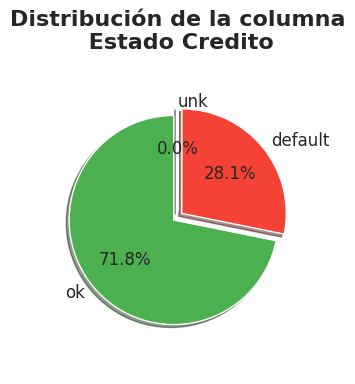

In [141]:
#Genero un grafico de pizza

graf_pizza_status = data['Estado Credito'].value_counts()

#configuración del grafico
plt.figure(figsize=(3,4))

#separa cada segmento del grafico
espacios = (0.05,0.05,0.05)
patches,texts,autotexts = plt.pie(
    graf_pizza_status,
    labels=graf_pizza_status.index,
    autopct = '%1.1f%%',
    startangle=90,
    colors = ['#4CAF50','#F44336','#9E9E9E'],
    explode = espacios,
    shadow=True,
    textprops={'fontsize':12}
)

#ajusto la posicion del nombre de unk
for text in texts:
  if text.get_text() == 'unk':
    x,y = text.get_position()
    text.set_position((x,y -0.05))#manipulo la posicion del nombre unk


#ajusto el titulo
plt.title('Distribución de la columna\n Estado Credito', fontsize = 16,fontweight='bold')
plt.axis('equal')#garantizo que el pastel sea circular
plt.tight_layout()


plt.show()

El grafico revela que el 71.8% de las personas demuestran un firme compromiso al cumplir sus responsabilidades<br> crediticias, mientras que el 28.1% ha incumplido sus responsabilidades de credito. Tambien se observan registros <br>ambiguos(unk) que carecen de claridad. Se recomienda convertir los
nombres ok y default a numericos ejemplo ok <br>por 1 y default por 0. Para preservar la precisión y robustez del modelo de scoring crediticio, se recomienda eliminar <br>la columna 'unk' para evitar que estos datos poco claros comprometan el análisis del modelo


#1.1 Formato de la columna Default

In [142]:
data['Estado Credito'].value_counts()

,count
Estado Credito,
ok,3200
default,1254
unk,1


Hago una copia de dataframe,convierto los valores en 1 y 0 de la columna status, elimino la columna unk

In [143]:
#creo una columna 'default' con valores si y no
data['default'] = data['Estado Credito'].apply(lambda x:1 if x == 'default' else 0)


#1.2 Datos anomalos

In [144]:
t_desc_num=data.describe()
t_desc_num.round(0)

,Años laborales,Plz prestamo meses,Edad,Gasto mensual,Ingresos mensuales,Ahorros,deudas,Dinero Solicitado,Dinero a devolver,default
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0,0.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0,0.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0,0.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0,0.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0,0.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0,1.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0,1.0


El valor máximo en las columnas income, assets y debt es 99999999.0 lo que extremadamente alto en comparación con los otros valores, Este numero no representa los datos reales de las personas.


In [145]:
data.replace(99999999,np.nan,inplace=True)#los valores anómalos como 99999999 los reemplazo comovalores nulos


#1.3 Imputando Datos


<ipython-input-146-1bb3c7311697>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = nulos.index,y=nulos.values,palette='coolwarm',legend=False)


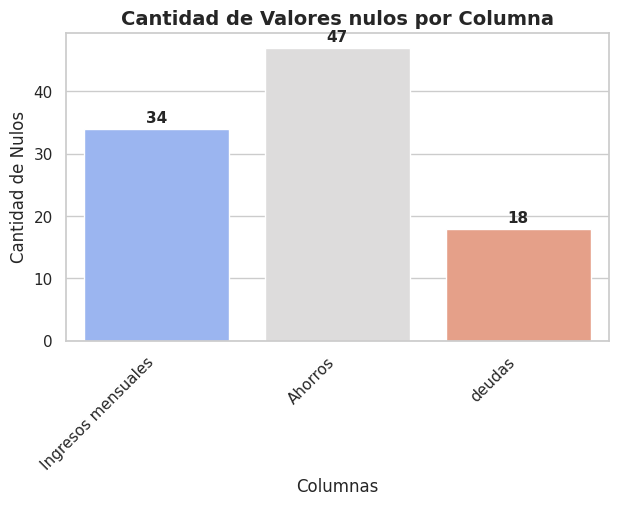

In [146]:
nulos =data.isnull().sum()#sumando nulos

#filtro solo la columna con valores nulos
nulos = nulos[nulos > 0]

#Grafico
plt.figure(figsize=(7,4))
sns.barplot(x = nulos.index,y=nulos.values,palette='coolwarm',legend=False)

#estilizamos el grafico
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Cantidad de Nulos', fontsize=12)
plt.title('Cantidad de Valores nulos por Columna', fontsize=14,fontweight='bold')
plt.xticks(rotation=45,ha='right')

#agregamos valores encima de las barras
for i, valor in enumerate(nulos.values):
  plt.text(i, valor+1, str(valor),ha='center',fontsize=11,fontweight='bold')

plt.show()


In [147]:
data['clase vivienda'].unique()

array(['rent', 'owner', 'parents', 'private', 'other', 'ignore', 'unk'],
      dtype=object)

In [148]:
#cambio los nombres de los valores dentro de las columnas cualitativas

espnol_vivienda_valores = {
    'owner':'propietario',
    'rent':'alquiler',

    'parents':'padres',
    'private':'privado',
    'other':'otros',
    'ignore':'ignorado',
    'unk':'desconocido'
}

espnol_estado_civil = {
    'single':'soltero',
    'married':'casado',
    'divorced':'divorciado',
    'widow':'viudo',
    'unknown':'desconocido'
}

espnol_tipo_empleo={
    'freelance':'independiente',
    'fixed':'fijo',
    'partime':'parcial',
    'unk':'desconocido',
    'others':'otros'
}

data['clase vivienda'] = data['clase vivienda'].replace(espnol_vivienda_valores)

data['Estado civil'] = data['Estado civil'].replace(espnol_estado_civil)

data['Tipo empleo'] = data['Tipo empleo'].replace(espnol_tipo_empleo)


In [149]:
data.fillna(data.select_dtypes(include=['number']).mean(),inplace=True)#cambio los nulos por la mediana de cada columna
data

,Estado Credito,Años laborales,clase vivienda,Plz prestamo meses,Edad,Estado civil,Historial creditos,Tipo empleo,Gasto mensual,Ingresos mensuales,Ahorros,deudas,Dinero Solicitado,Dinero a devolver,default
0,ok,9,alquiler,60,30,casado,no,independiente,73,129.0,0.0,0.0,800,846,0
1,ok,17,alquiler,60,58,viudo,no,fijo,48,131.0,0.0,0.0,1000,1658,0
2,default,10,propietario,36,46,casado,yes,independiente,90,200.0,3000.0,0.0,2000,2985,1
3,ok,0,alquiler,60,24,soltero,no,fijo,63,182.0,2500.0,0.0,900,1325,0
4,ok,0,alquiler,36,26,soltero,no,fijo,46,107.0,0.0,0.0,310,910,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,alquiler,60,39,casado,no,fijo,69,92.0,0.0,0.0,900,1020,1
4451,ok,22,propietario,60,46,casado,no,fijo,60,75.0,3000.0,600.0,950,1263,0
4452,default,0,propietario,24,37,casado,no,parcial,60,90.0,3500.0,0.0,500,963,1
4453,ok,0,alquiler,48,23,soltero,no,independiente,49,140.0,0.0,0.0,550,550,0


In [150]:
data.describe()

,Años laborales,Plz prestamo meses,Edad,Gasto mensual,Ingresos mensuales,Ahorros,deudas,Dinero Solicitado,Dinero a devolver,default
count,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,130.568197,5403.433984,342.948614,1039.021773,1462.875645,0.281481
std,8.173444,14.655225,10.984856,19.515878,86.037156,11511.937773,1243.341729,474.543007,628.089913,0.449772
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000,0.000000
25%,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1117.500000,0.000000
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3500.000000,0.000000,1000.000000,1400.000000,0.000000
75%,12.000000,60.000000,45.000000,72.000000,164.000000,6000.000000,0.000000,1300.000000,1692.000000,1.000000
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000,1.000000


Visualizo tres boxplot para las columnas 'income','assets' y 'debt' para conocer los valores atipicos


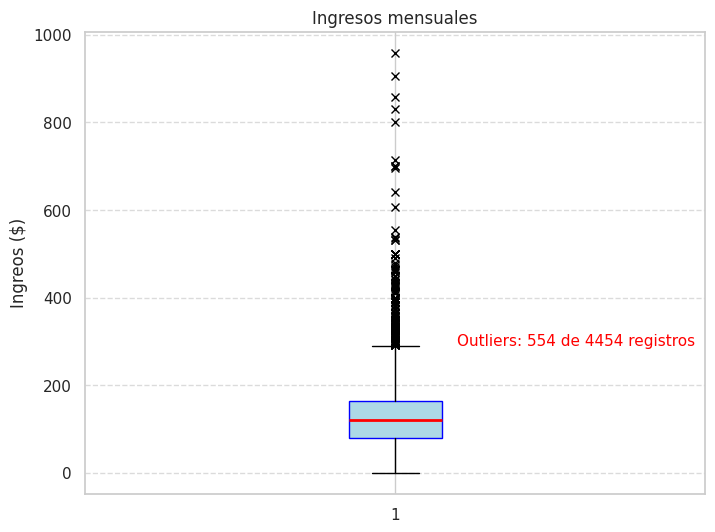

In [151]:
def boxplot_income(data):
  #filtro la columna income
  income = data['Ingresos mensuales']

  #Quartiles
  Q1 = np.percentile(income,25)
  Q3 = np.percentile(income,75)
  IQR = Q3 - Q1

  #obteniendo los limites para conocer outliers
  limite_inferior = Q1 - 1.5*IQR
  limite_superior = Q3 + 1.5 * IQR

  #valores atipicos
  outliers = income[(income < limite_inferior) | (income > limite_superior) | (income == 0)]
  cantidad_outliers = len(outliers)


  #boxplot
  plt.figure(figsize=(8,6))
  plt.boxplot(income, patch_artist=True,
              boxprops=dict(facecolor='lightblue',color='blue'),
              medianprops=dict(color='red',linewidth=2),
              flierprops=dict(marker='x',markerfacecolor='red',markersize=6))

  #titulo y etiquetas
  plt.title('Ingresos mensuales')
  plt.ylabel('Ingreos ($)')
  plt.grid(True,axis='y', linestyle='--',alpha=0.7)

  #visualizando valores atipicos
  plt.text(1.1, limite_superior,f'Outliers: {cantidad_outliers} de 4454 registros', fontsize=11,color='red')

  plt.show()

  return cantidad_outliers

num_outliers = boxplot_income(data)

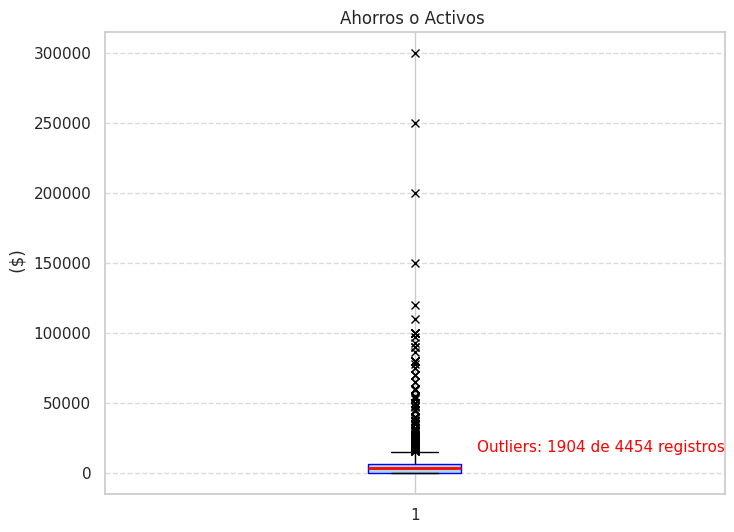

In [152]:
def boxplot_assets(data):
  #filtro la columna assets
  assets = data['Ahorros']

  #Quartiles
  Q1 = np.percentile(assets,25)
  Q3 = np.percentile(assets,75)
  IQR = Q3 - Q1

  #obteniendo los limites para conocer outliers
  limite_inferior = Q1 - 1.5*IQR
  limite_superior = Q3 + 1.5 * IQR

  #valores atipicos
  outliers = assets[(assets < limite_inferior) | (assets > limite_superior) | (assets == 0)]
  cantidad_outliers = len(outliers)


  #boxplot
  plt.figure(figsize=(8,6))
  plt.boxplot(assets, patch_artist=True,
              boxprops=dict(facecolor='lightblue',color='blue'),
              medianprops=dict(color='red',linewidth=2),
              flierprops=dict(marker='x',markerfacecolor='red',markersize=6))

  #titulo y etiquetas
  plt.title('Ahorros o Activos ')
  plt.ylabel(' ($)')
  plt.grid(True,axis='y', linestyle='--',alpha=0.7)

  #visualizando valores atipicos
  plt.text(1.1, limite_superior,f'Outliers: {cantidad_outliers} de 4454 registros', fontsize=11,color='red')

  plt.show()

  return cantidad_outliers

num_outliers_assets = boxplot_assets(data)

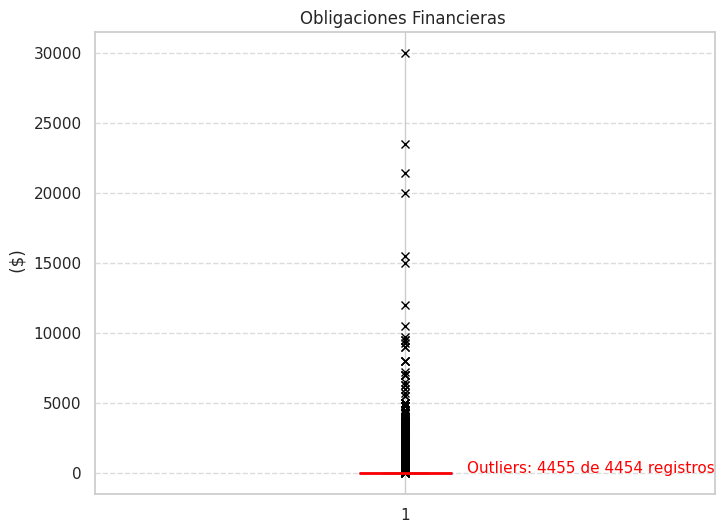

In [153]:
def boxplot_debt(data):
  #filtro la columna debt
  debt = data['deudas']

  #Quartiles
  Q1 = np.percentile(debt,25)
  Q3 = np.percentile(debt,75)
  IQR = Q3 - Q1

  #obteniendo los limites para conocer outliers
  limite_inferior = Q1 - 1.5*IQR
  limite_superior = Q3 + 1.5 * IQR

  #valores atipicos
  outliers = debt[(debt < limite_inferior) | (debt > limite_superior) | (debt == 0)]
  cantidad_outliers = len(outliers)


  #boxplot
  plt.figure(figsize=(8,6))
  plt.boxplot(debt, patch_artist=True,
              boxprops=dict(facecolor='lightblue',color='blue'),
              medianprops=dict(color='red',linewidth=2),
              flierprops=dict(marker='x',markerfacecolor='red',markersize=6))

  #titulo y etiquetas
  plt.title('Obligaciones Financieras ')
  plt.ylabel(' ($)')
  plt.grid(True,axis='y', linestyle='--',alpha=0.7)

  #visualizando valores atipicos
  plt.text(1.1, limite_superior,f'Outliers: {cantidad_outliers} de 4454 registros', fontsize=11,color='red')

  plt.show()

  return cantidad_outliers

num_outliers_debt = boxplot_debt(data)

La mayoria de los valores son cero(0), muchas personas no tienen deuda. Pero las pocas personas que tienen deuda son extremadamente altos como $30.000

In [154]:
data.deudas.describe()

,deudas
count,4455.000000
mean,342.948614
std,1243.341729
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,30000.000000


In [155]:
cero_debt = (data['deudas']==0).sum()
print(f'Cantidad de personas que no tienen deuda: {cero_debt}')

Cantidad de personas que no tienen deuda: 3670


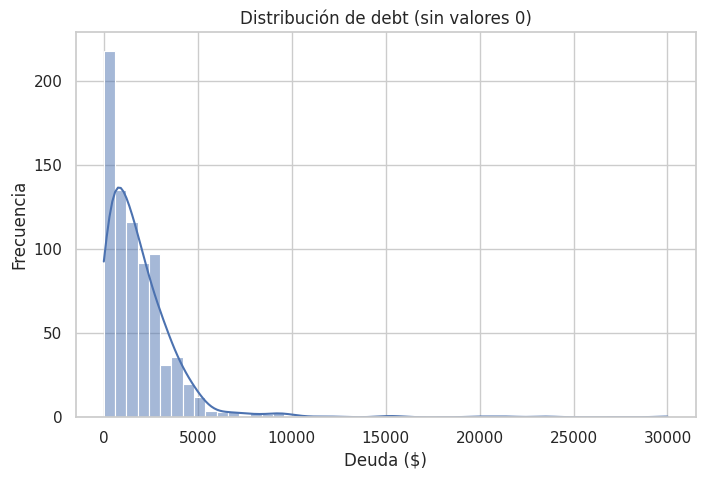

In [156]:

plt.figure(figsize=(8,5))
sns.histplot(data[data["deudas"] > 0]["deudas"], bins=50, kde=True)
plt.title("Distribución de debt (sin valores 0)")
plt.xlabel("Deuda ($)")
plt.ylabel("Frecuencia")
plt.show()


La mayoria de los valores son pequeños y a medida que aumenta la deuda la frecuancia cae, hay registros que superan los $10.000  hasta $30.000

#1.4 Descriptivos Numericos

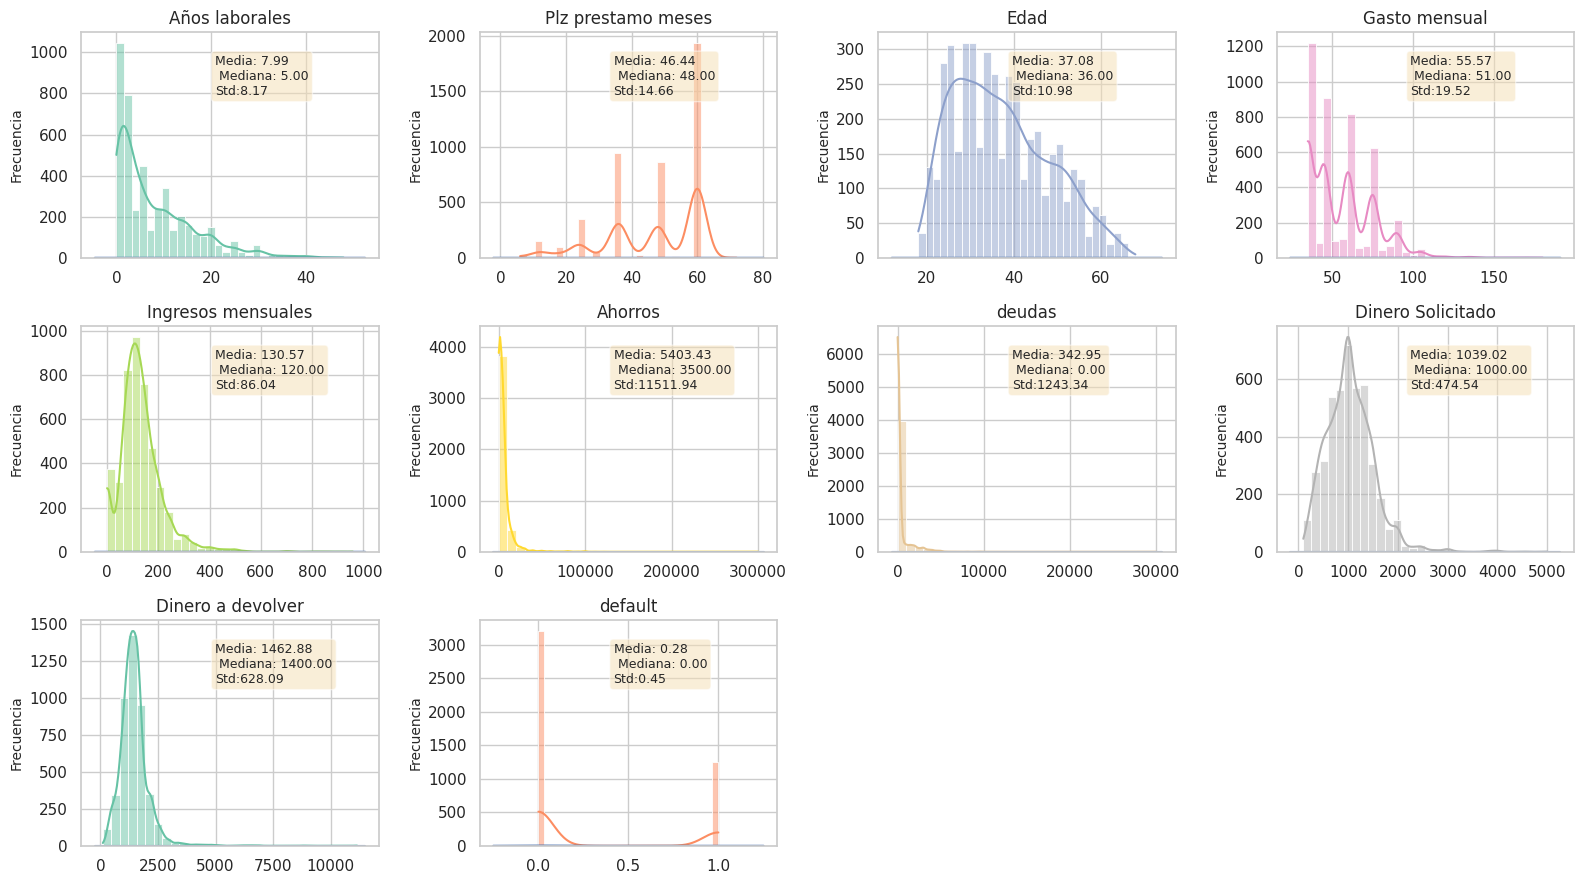

In [157]:
#selecciono solo las columnas de valores numericos para visualizarlas en histogramas

def Descriptivos_numericos():

  global   columnas_numericas


  columnas_numericas = t_desc_num.columns
  #numero de columnas que se van estar los histogramas
  numero_columnas = 4
  numero_filas = math.ceil(len(columnas_numericas)/numero_columnas)#numero de grillas


  #se crea la figura de 16 de ancho por 9 de alto
  fig, axes = plt.subplots(numero_filas,numero_columnas,figsize=(16,9))
  axes = axes.flatten()#recorro el boxplot

  axes = axes.flatten()# Para recorrer fácilmente todos los subplots

  paletts = sns.color_palette('Set2',len(columnas_numericas))#paletas de colores

  for i, j in enumerate(columnas_numericas):
      sns.histplot(data[j], bins=30, kde=True, ax=axes[i],color=paletts[i],label='histograma')

      #kde color negro
      sns.kdeplot(data[j],ax=axes[i])

      axes[i].set_title(f"{j}",fontsize=12)
      axes[i].set_xlabel('')
      axes[i].set_ylabel("Frecuencia",fontsize=10)

      #describe de cada histograma
      valor_mean = data[j].mean()
      valor_median = data[j].median()
      valor_std = data[j].std()


      #leyenda de cada boxplot
      info_text = f"Media: {valor_mean:.2f}\n Mediana: {valor_median:.2f}\nStd:{valor_std:.2f}"

      axes[i].text(0.45,0.90,info_text,transform=axes[i].transAxes,
                  verticalalignment='top',
                  bbox=dict(boxstyle='round',facecolor='wheat',alpha=0.5),
                  fontsize=9)


  #oculto los histogramas vacios
  for i in range(i + 1, len(axes)):
    axes[i].axis('off')


  plt.tight_layout()
  plt.show()

  return   columnas_numericas

columnas_numericas = Descriptivos_numericos()



In [158]:
data_columns = pd.DataFrame(data.columns, columns=['Nombre de Columnas'])
data_columns

,Nombre de Columnas
0,Estado Credito
1,Años laborales
2,clase vivienda
3,Plz prestamo meses
4,Edad
5,Estado civil
6,Historial creditos
7,Tipo empleo
8,Gasto mensual
9,Ingresos mensuales


#1.5 Truncando Valores atipicos

In [159]:
trunc = {'Gasto mensual':0.99,'Ingresos mensuales':0.99,'Ahorros':0.99,'deudas':0.99,'Dinero Solicitado':0.99,'Dinero a devolver':0.99}

resultados= []

for i, j in trunc.items():
  limite = round(data[i].quantile(j),2)#calculando el porcentil de cada columna
  data[i] = data[i].clip(upper=limite)#Truncando los valores
  resultados.append([i,limite])#agrego los resultados a la lista

df_resultados = pd.DataFrame(resultados,columns=['Columna','Limite de truncamiento'])
df_resultados




,Columna,Limite de truncamiento
0,Gasto mensual,106.46
1,Ingresos mensuales,428.92
2,Ahorros,50000.00
3,deudas,4773.00
4,Dinero Solicitado,2500.00
5,Dinero a devolver,3559.46


Este método nos permite manejar los valores atípicos sin eliminarlos por completo,<br> sino limitándolos a un lumbral razonable. En el caso de la columna expenses, se<br> calcula el porcentil de 99%, lo que indica que el 99% de los valores se encuentran<br> por debajo de 106.47

#1.6 Descriptivos Cualitativos

In [160]:
# Filtro solo columnas categóricas
cuali = data.select_dtypes('object')

# Estadísticas descriptivas de manera más visual
display(Markdown("<h3 style='color: green; font-size:24px;'>\n\n   📊 Resumen Variables Categóricas\n</h3>"))

display(cuali.describe())

# Interpretación del dataframe
display(Markdown("<h3 style='color: green; font-size:24px;'>✅ Análisis de Datos Categóricos:</h3>"))

interpretacion = f"""

📌 **Valores no nulos:** Todas las columnas tienen {cuali.shape[0]} datos, sin valores vacíos.

🎭 **Cantidad de categorías únicas:**
✅ Estado Credito: {cuali['Estado Credito'].nunique()} estados de credito\n
🏡 clase vivienda: {cuali['clase vivienda'].nunique()} tipos de vivienda\n
💍 Estado civil: {cuali['Estado civil'].nunique()} estados civiles\n
📂 Historial creditos: {cuali['Historial creditos'].nunique()} opciones ("si" o "no")\n
💼 Tipo empleo: {cuali['Tipo empleo'].nunique()} tipos de empleo

\n\n###   📌Valores más comunes y su frecuencia:\n\n
"""

# Detalles para cada columna con saltos de línea adicionales
for i in cuali.columns:
    top_value = cuali[i].mode()[0]  # Valor más frecuente
    freq = cuali[i].value_counts().max()  # Frecuencia del valor más común
    interpretacion += f"\n\n{i.capitalize()}: **'{top_value}'** ({freq} veces)\n"


# Mostrar por pantalla
from IPython.core.display import Markdown
display(Markdown(interpretacion))


<h3 style='color: green; font-size:24px;'>

   📊 Resumen Variables Categóricas
</h3>

,Estado Credito,clase vivienda,Estado civil,Historial creditos,Tipo empleo
count,4455,4455,4455,4455,4455
unique,3,7,6,2,5
top,ok,propietario,casado,no,fijo
freq,3200,2107,3241,3682,2806


<h3 style='color: green; font-size:24px;'>✅ Análisis de Datos Categóricos:</h3>



📌 **Valores no nulos:** Todas las columnas tienen 4455 datos, sin valores vacíos.

🎭 **Cantidad de categorías únicas:**
✅ Estado Credito: 3 estados de credito

🏡 clase vivienda: 7 tipos de vivienda

💍 Estado civil: 6 estados civiles

📂 Historial creditos: 2 opciones ("si" o "no")

💼 Tipo empleo: 5 tipos de empleo



###   📌Valores más comunes y su frecuencia:




Estado credito: **'ok'** (3200 veces)


Clase vivienda: **'propietario'** (2107 veces)


Estado civil: **'casado'** (3241 veces)


Historial creditos: **'no'** (3682 veces)


Tipo empleo: **'fijo'** (2806 veces)


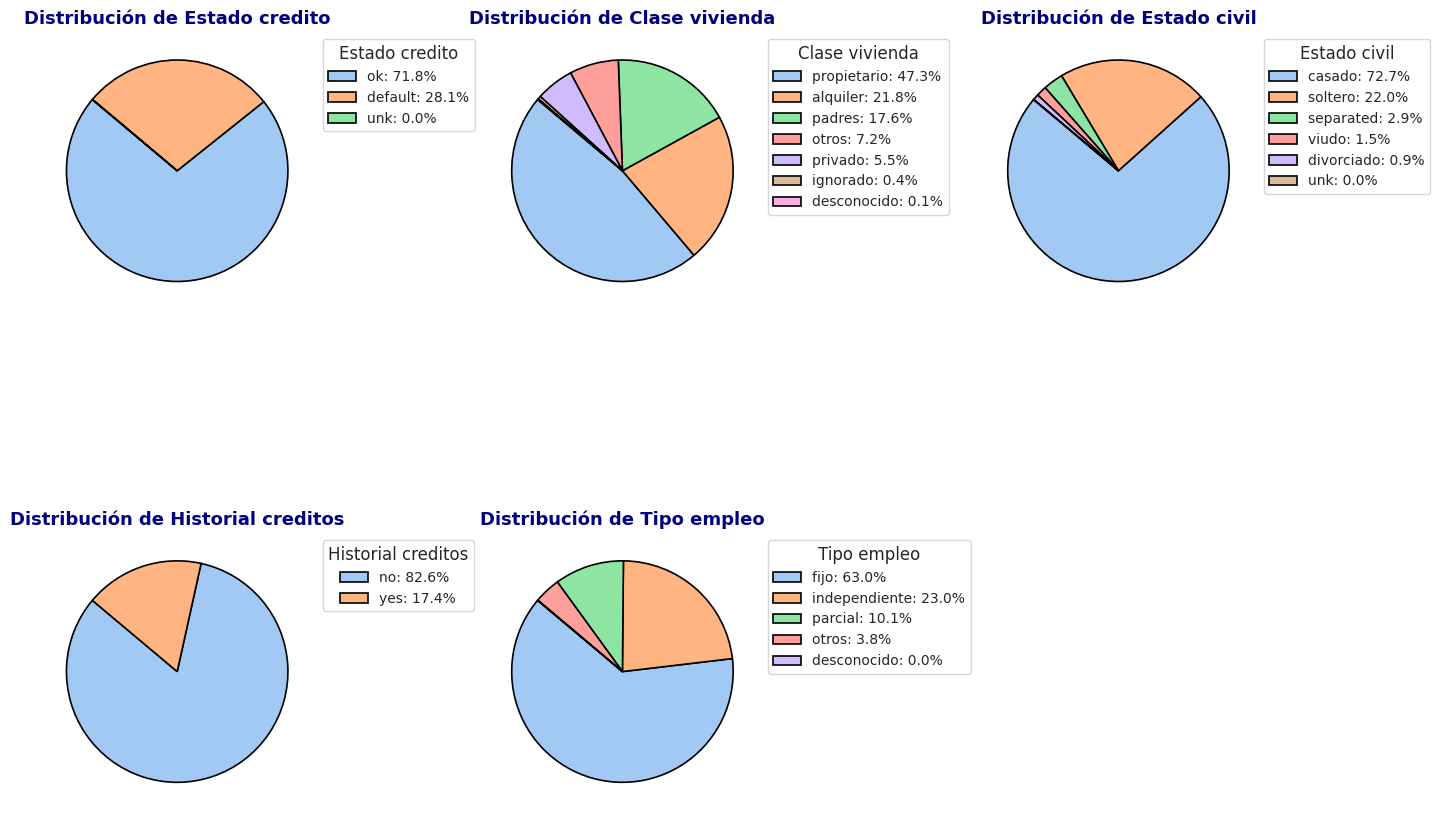

In [161]:

# Seleccionar columnas categóricas
cuali = data.select_dtypes('object')

sns.set_theme(style='whitegrid')

#filas y columnas
num_cols = len(cuali.columns)
filas = (num_cols // 3) + (num_cols % 3 > 0)  # Calcula filas necesarias
columnas = 3  # Siempre 3 columnas

# Crear figura
fig, axes = plt.subplots(filas, columnas, figsize=(14, 10), constrained_layout=True)

# Aplanar la matriz
axes = axes.flatten()

# Generar gráficos
for i, col in enumerate(cuali.columns):
    valores = cuali[col].value_counts()
    colores = sns.color_palette("pastel", len(valores))  # Colores llamativos

    wedges, _ = axes[i].pie(
        valores, colors=colores, startangle=140, wedgeprops={'edgecolor': 'black', 'linewidth': 1.2}
    )

    # Calcular porcentaje
    total = valores.sum()
    porcentajes = [f"{cat}: {count / total:.1%}" for cat, count in zip(valores.index, valores)]

    # Agregar título con mejor estilo
    axes[i].set_title(f"Distribución de {col.capitalize()}", fontsize=13, fontweight="bold", color="navy")

    # Agregar leyenda
    axes[i].legend(wedges, porcentajes, title=col.capitalize(), loc="upper left", fontsize=10, bbox_to_anchor=(1, 1))

# Eliminar ejes vacíos si hay menos gráficos que espacios
for i in range(i + 1, filas * columnas):
    fig.delaxes(axes[i])

plt.show()



#1.7 Reagrupando Categorias

In [162]:
#Trabajando sobre la columna 'clase vivienda'

data['clase vivienda'].value_counts()

,count
clase vivienda,
propietario,2107
alquiler,973
padres,783
otros,319
privado,247
ignorado,20
desconocido,6


In [163]:
agrupando_clase_vivienda = {
   'propietario': 'propietario',
    'alquiler': 'alquiler',
    'padres': 'padres',
    'privado': 'privado',
    'otros': 'other',  # Agrupo"otros", "ignorado" y "desconocido" en "other"
    'ignorado': 'other',
    'desconocido': 'other'
}

#reagrupando
data['clase vivienda'] = data['clase vivienda'].replace(agrupando_clase_vivienda)

data['clase vivienda'].value_counts()

,count
clase vivienda,
propietario,2107
alquiler,973
padres,783
other,345
privado,247


Se agruparon categorías poco representativas para mejorar la claridad<br> y utilidad del análisis. "Otros", "ignorado" y "desconocido" fueron combinados<br> en "other" (345 registros), evitando una fragmentación innecesaria.<br> Las categorías principales ("propietario", "alquiler", "padres" y "privado")<br> se mantuvieron, ya que representan la mayor parte de los datos.


In [164]:
#vamos a trabajar sobre la columna 'Estado Civil'

data['Estado civil'].value_counts()

,count
Estado civil,
casado,3241
soltero,978
separated,130
viudo,67
divorciado,38
unk,1


In [165]:
agrupando_estado_civil= {
    'casado':'casado',
    'soltero':'soltero',
    'separated':'other',
    'viudo':'other',
    'divorciado':'other',
    'unk':'other'
}

#reagrupando
data['Estado civil'] = data['Estado civil'].replace(agrupando_estado_civil)
data['Estado civil'].value_counts()

,count
Estado civil,
casado,3241
soltero,978
other,236


Las categorias 'separado', 'viudo', 'divorciado' y 'unk' fueron<br> combinadas en 'other' para simplificar el análisis y reducir<br> la fragmentación de los datos.

#1.8 Eliminando Columnas

In [166]:
data.drop(columns=['Estado Credito'], inplace=True)

La columna no aporta información clave para el análisis<br> y no tiene correlación con la variable objetivo 'default'.

#2. Exploración de Datos

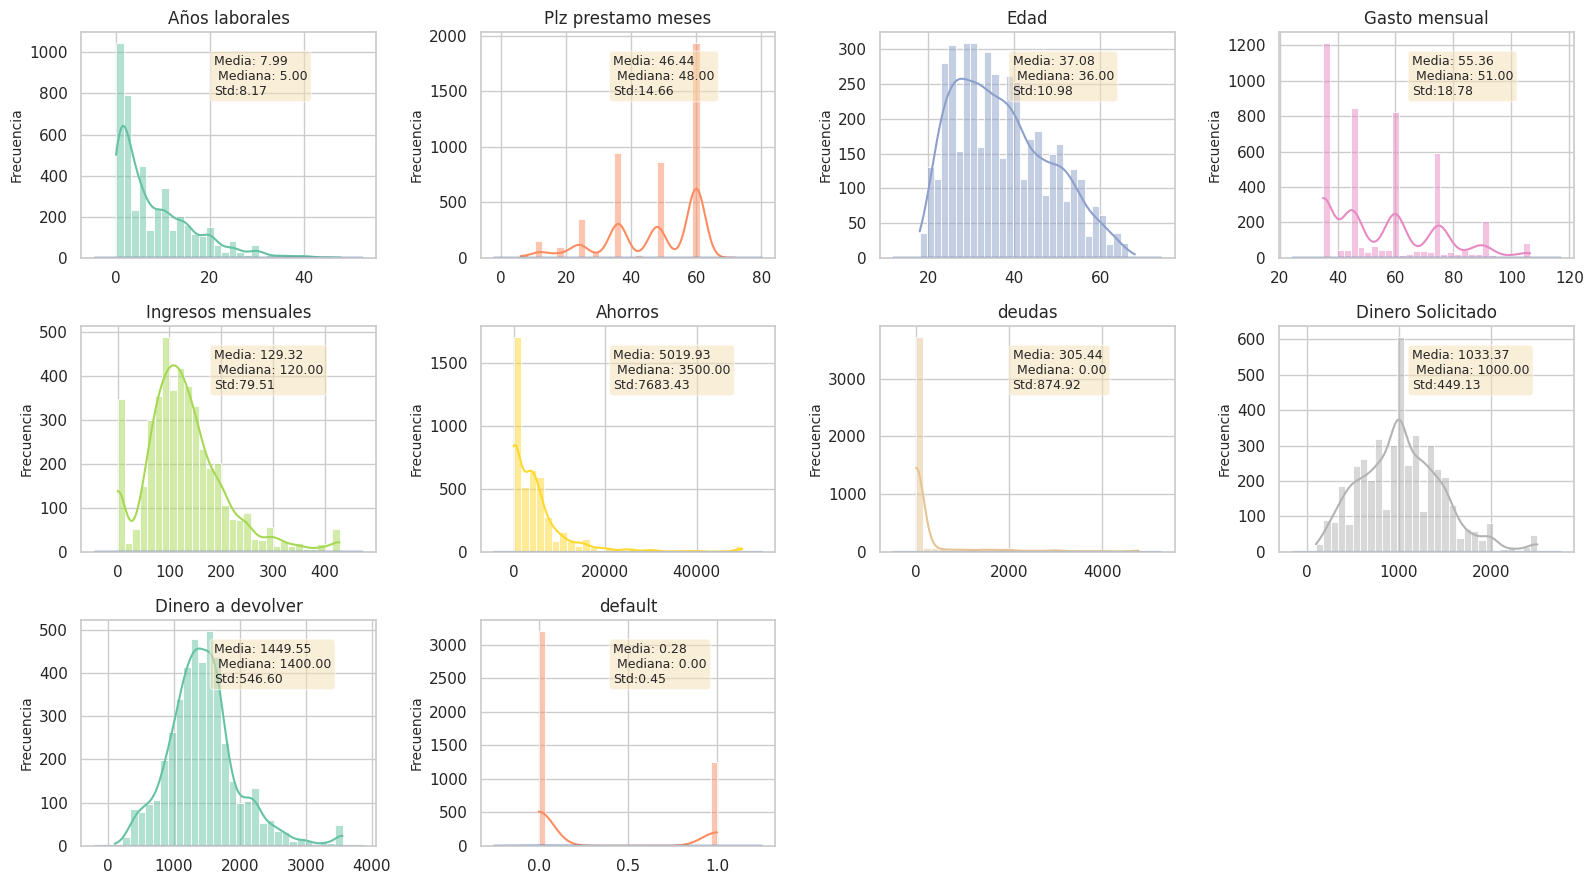

Index(['Años laborales', 'Plz prestamo meses', 'Edad', 'Gasto mensual',
       'Ingresos mensuales', 'Ahorros', 'deudas', 'Dinero Solicitado',
       'Dinero a devolver', 'default'],
      dtype='object')

In [167]:
Descriptivos_numericos()

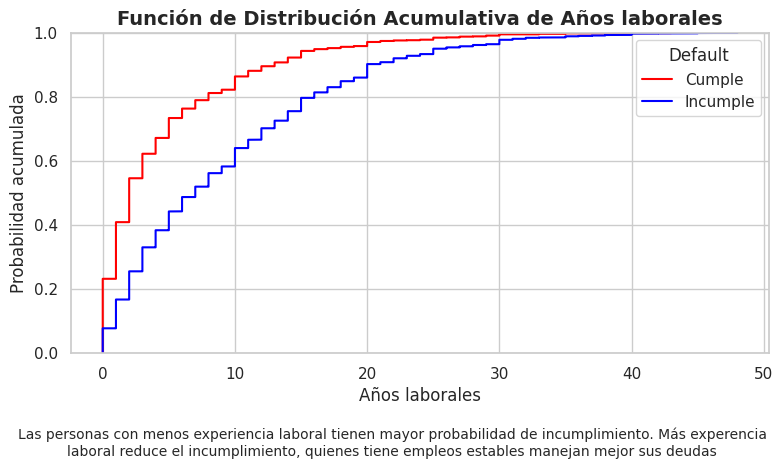

<Figure size 640x480 with 0 Axes>

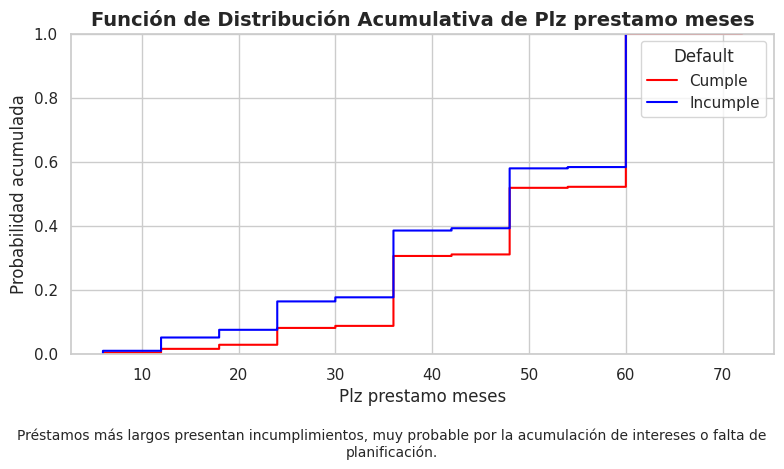

<Figure size 640x480 with 0 Axes>

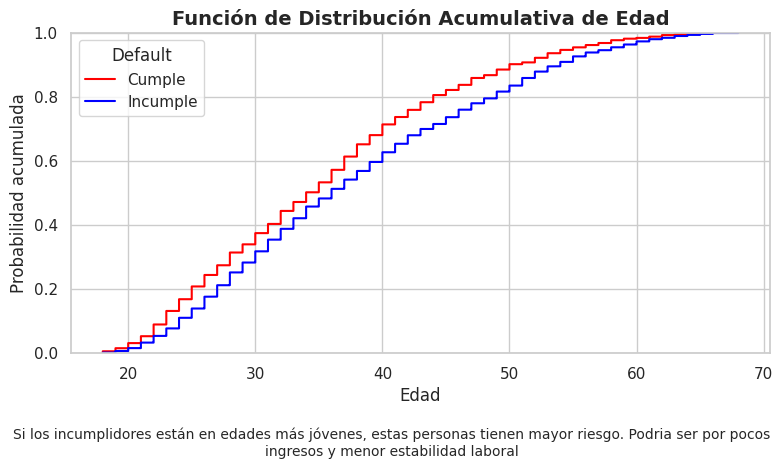

<Figure size 640x480 with 0 Axes>

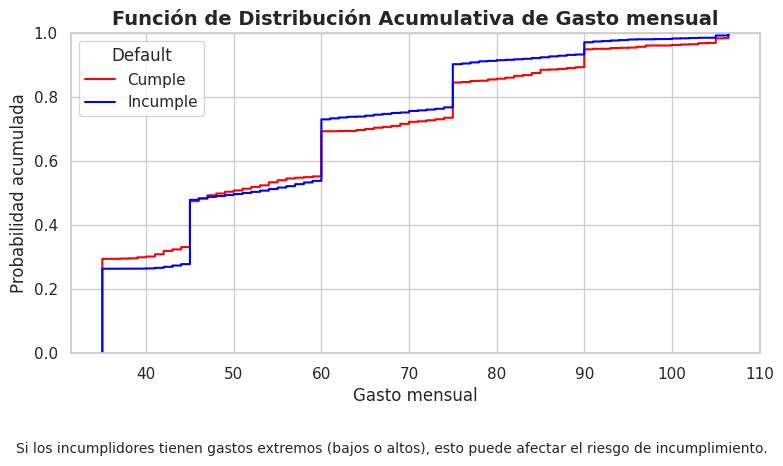

<Figure size 640x480 with 0 Axes>

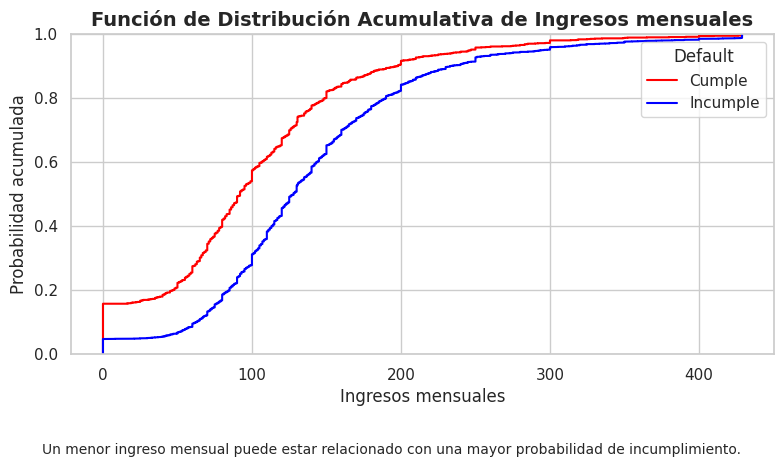

<Figure size 640x480 with 0 Axes>

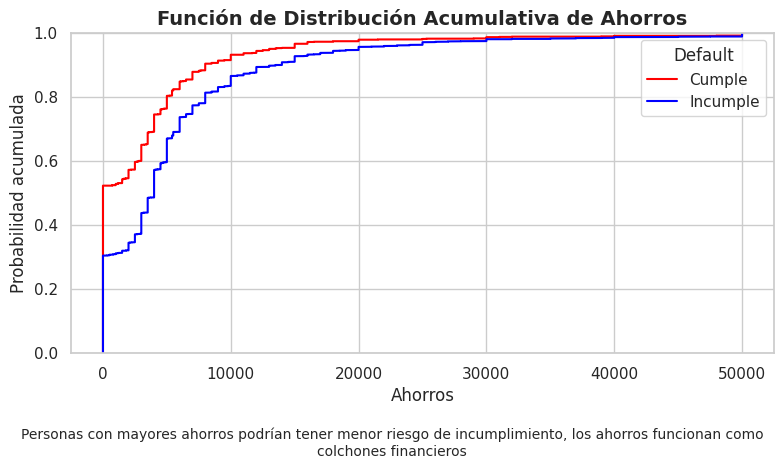

<Figure size 640x480 with 0 Axes>

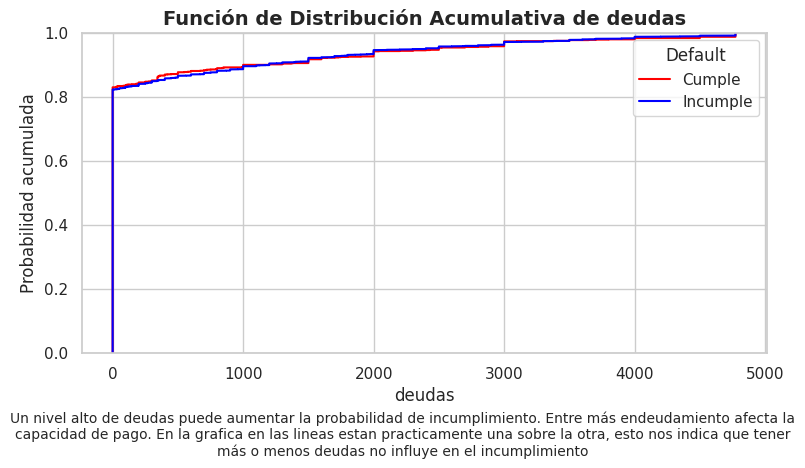

<Figure size 640x480 with 0 Axes>

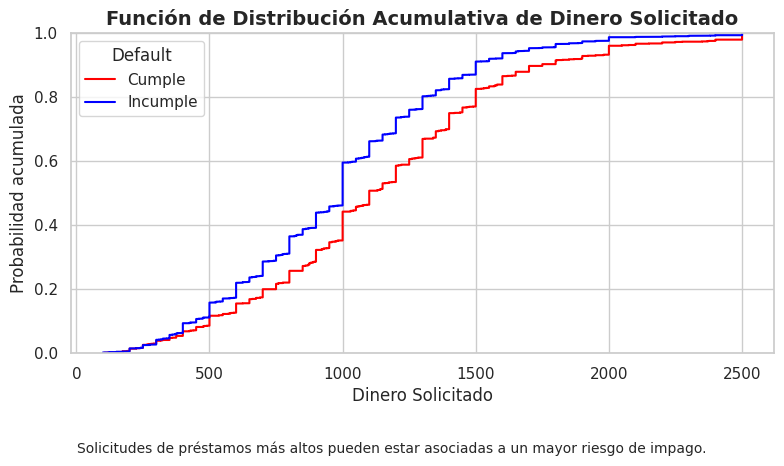

<Figure size 640x480 with 0 Axes>

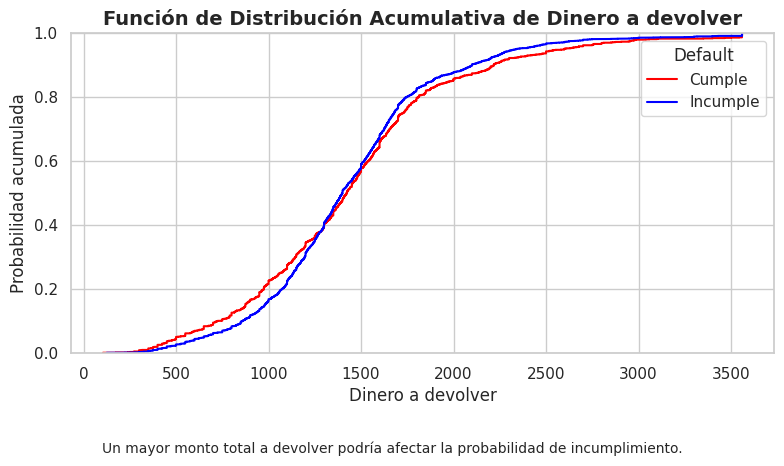

<Figure size 640x480 with 0 Axes>

In [168]:
#conclusiones por cada variable
conclusiones = {
    'Años laborales': "Las personas con menos experiencia laboral tienen mayor probabilidad de incumplimiento. Más experencia laboral reduce el incumplimiento, quienes tiene empleos estables manejan mejor sus deudas",

    'Plz prestamo meses': "Préstamos más largos presentan incumplimientos, muy probable por la acumulación de intereses o falta de planificación.",

    'Edad': "Si los incumplidores están en edades más jóvenes, estas personas tienen mayor riesgo. Podria ser por pocos ingresos y menor estabilidad laboral",

    'Historial creditos': "Un historial de crédito más largo puede estar asociado con menor probabilidad de incumplimiento.",

    'Gasto mensual': "Si los incumplidores tienen gastos extremos (bajos o altos), esto puede afectar el riesgo de incumplimiento.",

    'Ingresos mensuales': "Un menor ingreso mensual puede estar relacionado con una mayor probabilidad de incumplimiento.",

    'Ahorros': "Personas con mayores ahorros podrían tener menor riesgo de incumplimiento, los ahorros funcionan como colchones financieros",

    'deudas': "Un nivel alto de deudas puede aumentar la probabilidad de incumplimiento. Entre más endeudamiento afecta la capacidad de pago. En la grafica en las lineas estan practicamente una sobre la otra, esto nos indica que tener más o menos deudas no influye en el incumplimiento",

    'Dinero Solicitado': "Solicitudes de préstamos más altos pueden estar asociadas a un mayor riesgo de impago.",

    'Dinero a devolver': "Un mayor monto total a devolver podría afectar la probabilidad de incumplimiento."
}


#recorro sobre las columnas numericas excepto la columna defaul

for i in columnas_numericas.drop('default'):
    plt.figure(figsize=(8,4))

    #Graficar CDF por la variable objetivo 'default'
    sns.ecdfplot(data=data, x=i, hue='default', palette=['blue','red']) # Cambia esta línea y la siguiente


    #Titulo y etiquetas
    plt.title(f'Función de Distribución Acumulativa de {i}',fontsize=14,fontweight='bold')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('Probabilidad acumulada', fontsize=12)
    plt.legend(title='Default', labels=['Cumple','Incumple'])

    #agregar conclusiones
    plt.figtext(0.5,-0.15,conclusiones.get(i),
         wrap=True,horizontalalignment='center',fontsize=10, bbox=dict(facecolor='white',alpha=0.5))


    plt.tight_layout()
    plt.subplots_adjust(top=0.9,bottom=0.1)
    plt.show()
    plt.figure()

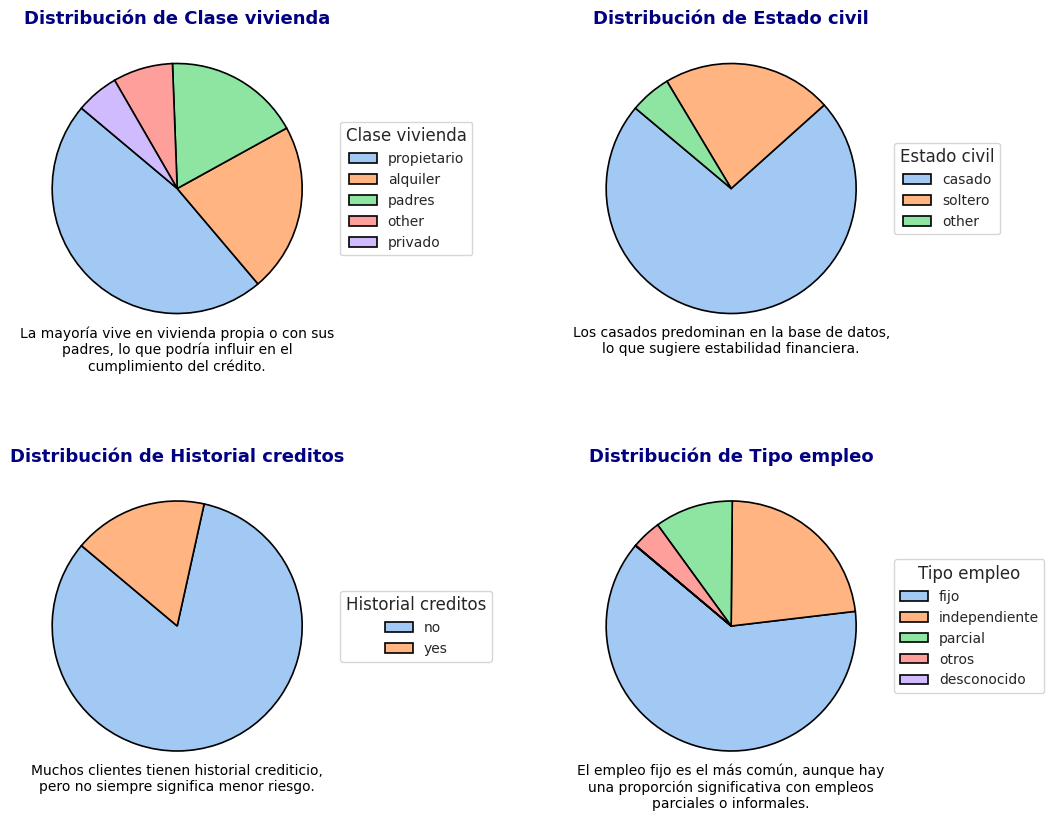

In [169]:
# Seleccionar columnas categóricas
cuali = data.select_dtypes('object')

sns.set_theme(style='whitegrid')

# Diccionario con conclusiones para cada categoría
conclusiones_pastel = {
    'clase vivienda': 'La mayoría vive en vivienda propia o con sus padres, lo que podría influir en el cumplimiento del crédito.',
    'Estado civil': 'Los casados predominan en la base de datos, lo que sugiere estabilidad financiera.',
    'Historial creditos': 'Muchos clientes tienen historial crediticio, pero no siempre significa menor riesgo.',
    'Tipo empleo': 'El empleo fijo es el más común, aunque hay una proporción significativa con empleos parciales o informales.'
}

# Filas y columnas
filas, columnas = 2, 2

# Crear figura
fig, axes = plt.subplots(filas, columnas, figsize=(12, 10))
axes = axes.flatten()

# Generar gráficos de pastel
for i, j in enumerate(cuali.columns):
    valores = cuali[j].value_counts()
    colores = sns.color_palette("pastel", len(valores))

    # Crear gráfico de pastel (sin porcentajes)
    wedges, texts = axes[i].pie(
        valores, colors=colores, startangle=140,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.2}, autopct=None
    )

    # Agregar título del gráfico
    axes[i].set_title(f"Distribución de {j.capitalize()}", fontsize=13, fontweight="bold", color="navy")

    # Agregar leyenda
    axes[i].legend(valores.index, title=j.capitalize(), loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

    # Obtener la conclusión y dividirla en líneas cortas
    conclusion = conclusiones_pastel.get(j, "")
    wrapped_text = textwrap.fill(conclusion, width=45)

    # Posicionar dinámicamente la conclusión (más arriba)
    axes[i].text(0.5, 0.06 * (fig.get_size_inches()[1] / 10), wrapped_text,
                 ha='center', va='top', fontsize=10, color='black', transform=axes[i].transAxes)

# Ajustar diseño automáticamente según tamaño
plt.tight_layout(rect=[0, 0.1, 0.9, 1])  # Reducimos el ancho útil para que la leyenda no se superponga
plt.subplots_adjust(top=0.9, bottom=0.15, wspace=0.5, hspace=0.4)

plt.show()



#2.2 Datos Cualitativos

#2.3 Contribución al riesgo

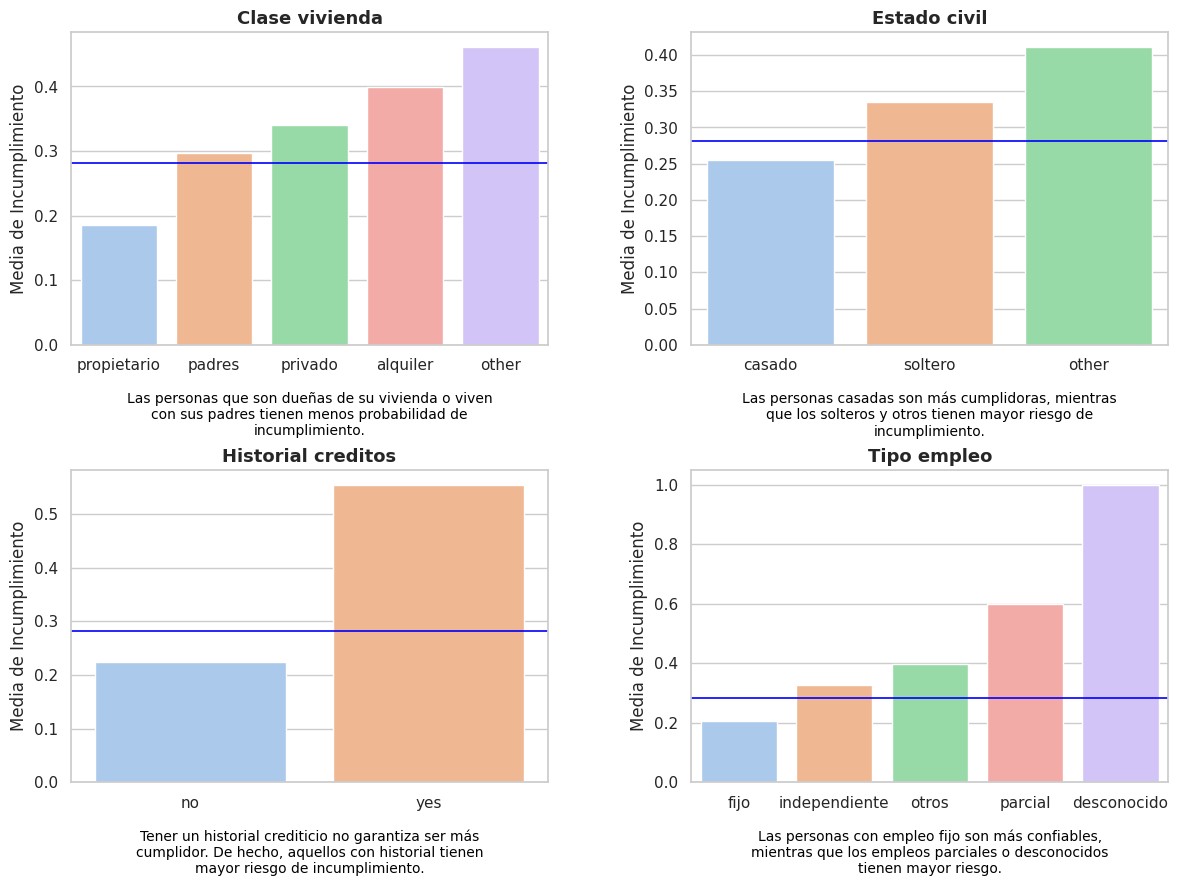

In [170]:
# Columnas categóricas
cualis = data.select_dtypes(['object']).columns
media_variables = data['default'].mean()  # Media de la variable objetivo

# Diccionario con conclusiones
concluciones_graficos_barras = {
    'clase vivienda': 'Las personas que son dueñas de su vivienda o '
                      'viven con sus padres tienen menos probabilidad '
                      'de incumplimiento.',

    'Estado civil': 'Las personas casadas son más cumplidoras, mientras '
                    'que los solteros y otros tienen mayor riesgo '
                    'de incumplimiento.',

    'Historial creditos': 'Tener un historial crediticio no garantiza '
                          'ser más cumplidor. De hecho, aquellos con '
                          'historial tienen mayor riesgo de incumplimiento.',

    'Tipo empleo': 'Las personas con empleo fijo son más confiables, '
                   'mientras que los empleos parciales o desconocidos '
                   'tienen mayor riesgo.'
}

# Tamaño de gráficos y cantidad
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

# Iterar sobre las variables categóricas
for i, j in enumerate(cualis):
    ax = axes[i]

    # Obtener la media de cada categoría
    media_categorias = data.groupby(j)['default'].mean().sort_values()

    # Crear el gráfico de barras
    sns.barplot(x=media_categorias.index, y=media_categorias.values,
                ax=ax, palette='pastel', hue=media_categorias, legend=False)

    # Agregar línea horizontal representando la media global
    ax.axhline(media_variables, color='blue', linewidth=1.2)

    # Título y etiquetas
    ax.set_title(j.capitalize(), fontsize=13, fontweight='bold')
    ax.set_ylabel('Media de Incumplimiento')
    ax.set_xlabel('')  # Eliminar el título del eje X

    # Obtener la conclusión y dividirla en 3 líneas
    conclusion = concluciones_graficos_barras.get(j, "")
    wrapped_text = textwrap.fill(conclusion, width=50)

    # Agregar la conclusión MÁS CERCA del gráfico
    ax.text(0.5, -0.15, wrapped_text, ha='center', va='top',
            fontsize=10, color='black', transform=ax.transAxes)

# Ajustar el diseño para reducir espacios
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Reduce el margen inferior
plt.subplots_adjust(top=0.9, bottom=0.15, wspace=0.3, hspace=0.4)

plt.show()



Podemos cuncluir sobre el grafico de pizza y el grafico de barras que la mayoria de las personas que tienn casa, estan casadas, no tienen historial crediticio y tienen empleo fijo, es una población aparentemente con estabilidad financiera

#3. Construcción de Modelos

##3.1 Partición de Datos

In [171]:
data.head()

,Años laborales,clase vivienda,Plz prestamo meses,Edad,Estado civil,Historial creditos,Tipo empleo,Gasto mensual,Ingresos mensuales,Ahorros,deudas,Dinero Solicitado,Dinero a devolver,default
0,9,alquiler,60,30,casado,no,independiente,73.0,129.0,0.0,0.0,800,846.0,0
1,17,alquiler,60,58,other,no,fijo,48.0,131.0,0.0,0.0,1000,1658.0,0
2,10,propietario,36,46,casado,yes,independiente,90.0,200.0,3000.0,0.0,2000,2985.0,1
3,0,alquiler,60,24,soltero,no,fijo,63.0,182.0,2500.0,0.0,900,1325.0,0
4,0,alquiler,36,26,soltero,no,fijo,46.0,107.0,0.0,0.0,310,910.0,0


In [172]:
x = data.drop(columns='default')#elimino la columna objetivo que es 'default'
x = pd.get_dummies(x)#guardo en las variables predictoras, convertimos cada columna categorica 'object' en columnas binarias ceros y unos, de esta forma todas las columnas de x pasan hacer todas numericas facilitando el entrenamientos de modelos.
y = data['default']#y lo vamos a usar para los modelos

In [173]:
boolean_columns = x.select_dtypes(include='bool').columns#recorro todas las columnas del dataframe x buscando valores valores boleanos True o False y guardamos el resultado. como resultado detemos una lista
boolean_columns

Index(['clase vivienda_alquiler', 'clase vivienda_other',
       'clase vivienda_padres', 'clase vivienda_privado',
       'clase vivienda_propietario', 'Estado civil_casado',
       'Estado civil_other', 'Estado civil_soltero', 'Historial creditos_no',
       'Historial creditos_yes', 'Tipo empleo_desconocido', 'Tipo empleo_fijo',
       'Tipo empleo_independiente', 'Tipo empleo_otros',
       'Tipo empleo_parcial'],
      dtype='object')

In [174]:
x[boolean_columns] = x[boolean_columns].fillna(False).astype(int)#las columnas con valores booleanos los convertimos en entero. con fillna aseguro no tener nulos
x.head()

,Años laborales,Plz prestamo meses,Edad,Gasto mensual,Ingresos mensuales,Ahorros,deudas,Dinero Solicitado,Dinero a devolver,clase vivienda_alquiler,...,Estado civil_casado,Estado civil_other,Estado civil_soltero,Historial creditos_no,Historial creditos_yes,Tipo empleo_desconocido,Tipo empleo_fijo,Tipo empleo_independiente,Tipo empleo_otros,Tipo empleo_parcial
0,9,60,30,73.0,129.0,0.0,0.0,800,846.0,1,...,1,0,0,1,0,0,0,1,0,0
1,17,60,58,48.0,131.0,0.0,0.0,1000,1658.0,1,...,0,1,0,1,0,0,1,0,0,0
2,10,36,46,90.0,200.0,3000.0,0.0,2000,2985.0,0,...,1,0,0,0,1,0,0,1,0,0
3,0,60,24,63.0,182.0,2500.0,0.0,900,1325.0,1,...,0,0,1,1,0,0,1,0,0,0
4,0,36,26,46.0,107.0,0.0,0.0,310,910.0,1,...,0,0,1,1,0,0,1,0,0,0


Se identificaron y transformaron las columnas booleanas del DataFrame, convirtiendo los valores True y False en 1 y 0. Permitiendo que todas las variables del DataFrame fueran numéricas, incluyendo las columnas categoricas con get_dummies(). Esto lo hize para facilitar el uso con el modelo de Machine Learning que voy a utilizar para el entrenamiento

In [175]:
#X_train datos de entrenamiento 70% de entrenamieno

#X_test datos de prueba 30% de prueba

#y_train etiquetas de entrenamiento variable objetivo default 70% de entrenamiento. aqui esta guardada la respuesta correcta es decir si alguien pago el credito o no.

#y_test Etiquetas de pruebas variable objetivo 30 porciento de prueba. con estos datos evaluamos el modelo si funciona sus predicciones

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Mostrar tamaños de cada conjunto
print(f"           Tamaño total de los datos: {x.shape[0]}\n")

print('              Tamaño de datos de entrenamientos\n')

print(f"Tamaño de X_train: {X_train.shape[0]} ({(X_train.shape[0] / x.shape[0]) * 100:.2f}%)\n")

print(f"Tamaño de X_test: {X_test.shape[0]} ({(X_test.shape[0] / x.shape[0]) * 100:.2f}%)\n")


print(f'                  Tamaño de datos de pruebas\n')

print(f"Tamaño de y_train: {y_train.shape[0]} ({(y_train.shape[0] / y.shape[0]) * 100:.2f}%)\n")
print(f"Tamaño de y_test: {y_test.shape[0]} ({(y_test.shape[0] / y.shape[0]) * 100:.2f}%)")

           Tamaño total de los datos: 4455

              Tamaño de datos de entrenamientos

Tamaño de X_train: 3118 (69.99%)

Tamaño de X_test: 1337 (30.01%)

                  Tamaño de datos de pruebas

Tamaño de y_train: 3118 (69.99%)

Tamaño de y_test: 1337 (30.01%)


El modelo lo entrenamos con X_train y y_train, despues probamos el entrenamiento<br> con X_test luego con y_test para ver tan bien aprendio el modelo.

#3.2 Modelos de Clasificación

##Modelo logit

##Ajustar modelo

In [176]:
#Modelo de regresión Logística

reg_logit = LogisticRegression(max_iter=500)#500 con las interacciones que el modelo va tener para encontar una mejor solución

#entrenando el modelo
reg_logit.fit(X_train_scaled,y_train)



LogisticRegression(max_iter=500)

##Predicción Inicial

In [177]:
#El modelo .predict usa el modelo entrenado (reg_logit) para hacer prediccions sobre los datos de pruebas escalados
clas_logit = reg_logit.predict(X_test_scaled)

In [178]:
pd.crosstab(y_test, clas_logit,margins=True, rownames=['Valor real'],
            colnames={'Predicción Modelo'}).rename(columns={0:'Cumple',1:'Incumple'},
                    index={0:'Cumple',1:'Incumple','All':'Total'}
                                                   )

Predicción Modelo,Cumple,Incumple,All
Valor real,,,
Cumple,893,52,945
Incumple,209,183,392
Total,1102,235,1337


El modelo tubo una preción de 80%, no es bueno detectando<br> quien incumplira (solo 46%)si quiero minimizar riesgos en<br> decisiones financieras.<br><br> El modelo clasifico correctamente 1076 casos en total (893+183).<br>
<br>
El modelo se equivoco en 261 casos (52+209).<br>
<br>
El modelo predijo 'Cumplimiento'(0) 1102 veces, pero 209 eran en realidad.<br><br>
El modelo predijo 'Incumplimiento'(1) 235 veces, delas cuales 183 fueron correctas

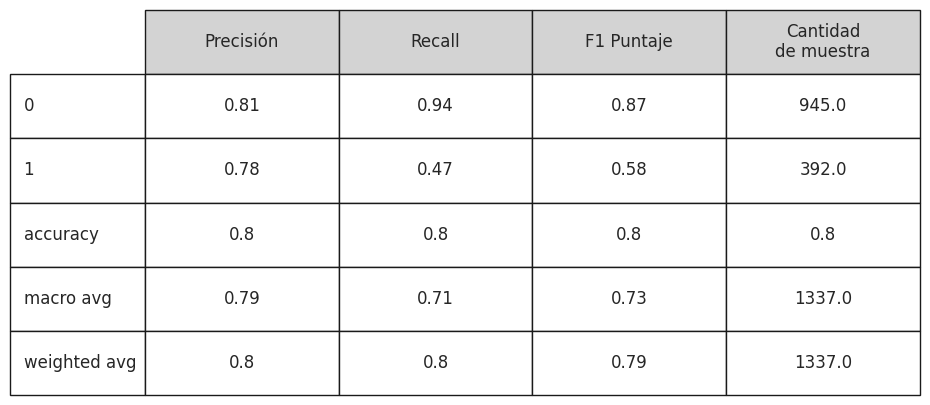

In [179]:

# Generar el reporte en formato de diccionario
reporte = classification_report(y_test, clas_logit, output_dict=True)

# Convertir a DataFrame y transponer
df_reporte = pd.DataFrame(reporte).T

# Redondear valores a 2 decimales
df_reporte = df_reporte.round(2)

# Renombrar columnas con saltos de línea
df_reporte = df_reporte.rename(columns={
    'precision': 'Precisión',
    'recall': 'Recall',
    'f1-score': 'F1 Puntaje',
    'support': 'Cantidad\nde muestra'
})

# Ajustar el tamaño de la tabla
fig, ax = plt.subplots(figsize=(10, 5))  # Ajustar el tamaño general

ax.axis('tight')
ax.axis('off')

# Crear la tabla con ajustes de tamaño de fuente y cuadros
tabla = ax.table(
    cellText=df_reporte.values,
    colLabels=df_reporte.columns,
    rowLabels=df_reporte.index,
    cellLoc='center',
    loc='center',
    colColours=["lightgray"] * df_reporte.shape[1],  # Color de fondo para encabezados
    bbox=[0, 0, 1, 1]  # Ajuste del tamaño de la tabla en el gráfico
)

tabla.auto_set_font_size(False)
tabla.set_fontsize(12)  # Tamaño de la fuente
tabla.scale(1.2, 1.2)  # Escalar la tabla para agrandar celdas

plt.show()


Conclución de los resultados<br><br>
El modelo de regresión logistica muestra una precisión del 81% para los clientes que cumplen y 78% para los clientes incumplidos. El recall para para los incumplidos es solo del 47%, lo que indica que el modelo no detecta bien a todos los clientes que realmente incumple.
La exactitud global es del 80% el modelo tiene dificultades para identificar correctamente a los clientes que podrian incumplir.<br><br>
F1 para clientes incumplidos (0.58) es bajo, un equilibrio débil entre precisión y recall en esta categoria, Para clientes cumplidos es 0.87% lo que indica buen desempeño.<br><br>
Accuraacy (80%) El modelo clasifico correctamente 8 de cada 10 casos, pero puede ser engañoso debido al desbalance de las clases.

##Curva ROC

In [180]:
# Predicción de probabilidades
y_pred_proba = reg_logit.predict_proba(X_test_scaled)[:, 1]  # Probabilidades de la clase positiva (1)


In [181]:


# Calcular la Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [182]:
def hist_fill_p(y_test, scaled_scores, bins=10):
    """
    Crea un histograma comparativo de 'scaled_scores', separando
    los casos según el valor de 'y_test' (0 o 1).

    Parámetros:
    -----------
    y_test : array-like
        Variable objetivo binaria (0 = no incumple, 1 = incumple).
    scaled_scores : array-like
        Puntajes o probabilidades del modelo para la clase positiva.
    bins : int
        Número de intervalos (bins) para el histograma.
    """
    # Dividir los scores en función de la clase real
    scores_0 = scaled_scores[y_test == 0]
    scores_1 = scaled_scores[y_test == 1]

    # Crear la figura
    plt.figure(figsize=(8, 6))

    # Histograma para la clase 0
    plt.hist(scores_0, bins=bins, alpha=0.5, label='Default = 0', color='blue')

    # Histograma para la clase 1
    plt.hist(scores_1, bins=bins, alpha=0.5, label='Default = 1', color='orange')

    # Personalizar el gráfico
    plt.title('Distribución de Scores de Regresión Logística')
    plt.xlabel('Score')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.show()



In [183]:
roc_auc = auc(fpr, tpr)  # Área bajo la curva (AUC)


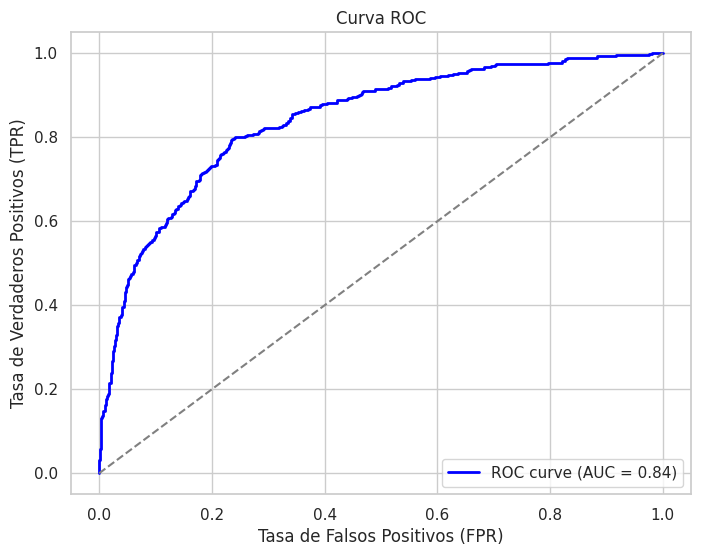

In [184]:

# Graficar la Curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


In [185]:
#predicción de cada clase
y_pred_proba2 = reg_logit.predict_proba(X_test_scaled)[:,1]

#ajusto el umbral(menos falsos positivos)
umbral = 0.6
clas_logit2 = (y_pred_proba2 >= umbral).astype(int)#convertir  0 o 1 segun el umbral

pd.crosstab(y_test,clas_logit2, margins=True)

col_0,0,1,All
default,,,
0,912,33,945
1,252,140,392
All,1164,173,1337


Conclusión de la Curva ROC<br><br>
La curva azul muestra el rendimiento del modelo de clasificación.<br> La linea diagonal  gris representa un modelo sin capacidad predictiva.<br><br>
El AUC de 0.84 indica un buen desempeño del modelo y tiene alta probabilidad<br> de distinguir correctamente entre un caso positivo y un caso negativo.<br><br>
La curva esta más cerca de la esquina superior izquierda, lo que indica una<br>mejor separación entre clases y menor tasa de falsos positivos.

Interpretación<br><br>
912 casos correctamente clasificados como cumplidos<br><br>
140 casos fueron correctamente clasificados como incumplidos.<br><br>
33 casos fueron identificados falsos positivos, el modelo predijo 1 pero en realidad era 0.<br><br>
252 casos fueron falsos negativos, el modelo prdijo 0 pero en realidad era 1

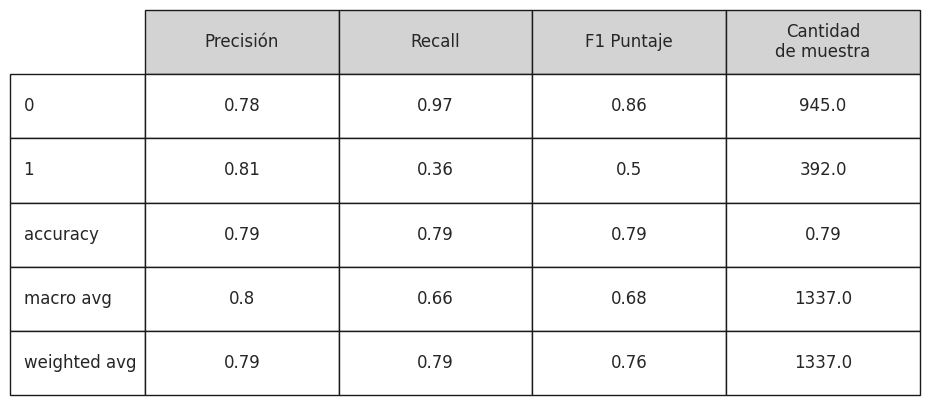

In [186]:

# Generar el reporte en formato de diccionario
reporte = classification_report(y_test, clas_logit2, output_dict=True)

# Convertir a DataFrame y transponer
df_reporte = pd.DataFrame(reporte).T

# Redondear valores a 2 decimales
df_reporte = df_reporte.round(2)

# Renombrar columnas con saltos de línea
df_reporte = df_reporte.rename(columns={
    'precision': 'Precisión',
    'recall': 'Recall',
    'f1-score': 'F1 Puntaje',
    'support': 'Cantidad\nde muestra'
})

# Ajustar el tamaño de la tabla
fig, ax = plt.subplots(figsize=(10, 5))  # Ajustar el tamaño general

ax.axis('tight')
ax.axis('off')

# Crear la tabla con ajustes de tamaño de fuente y cuadros
tabla = ax.table(
    cellText=df_reporte.values,
    colLabels=df_reporte.columns,
    rowLabels=df_reporte.index,
    cellLoc='center',
    loc='center',
    colColours=["lightgray"] * df_reporte.shape[1],  # Color de fondo para encabezados
    bbox=[0, 0, 1, 1]  # Ajuste del tamaño de la tabla en el gráfico
)

tabla.auto_set_font_size(False)
tabla.set_fontsize(12)  # Tamaño de la fuente
tabla.scale(1.2, 1.2)  # Escalar la tabla para agrandar celdas

plt.show()


Conclusiones:<br><br>
El modelo dectecta clientes que cumplen (recall 0.97), pero tiene dificultades para identificar incumplidos (0.36).
<br><br>
Al tener un recall bajo en incumplidos, el modelo puede ser riesgoso en un entorno financiero, ya que deja pasar muchos clientes de alto riesgo.
<br><br>
Como recomendación se debe ajustar el umbral  de clasifiación  o mejorar el modelo para aumentar el recall de incumplidos y reducir falsos negativos

##score

In [187]:
reg_logit = LogisticRegression()#Creo un modelo de regresión logística sin entrenar
reg_logit.fit(X_train, y_train)#entreno el modelo con los datos de emtrenamiento(X_train,y_train)
reg_logit#Visualizo la configuraación del modelo

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [188]:
def hist_fill_p(y_test,scaled_scores,bins=10):
    """
      creo dos histogramas comparativos de 'scaled_scores,seprando
      los caos según el valor de y_test (0 = cumple, 1 = incumple)

      se define his_fill_p que recibe como parámetros los valores reales (y_test), los puntajes escalados (scaled_scores) y el número de bins= 10
      (el parametro bins=10 es el valor por defecto que se dividiran los cubos
      al crear el histograma. Cada bin representa un rango de valores y ayuda a identificar patrones o concentraciones en los datos)

    """
    fig, ax = plt.subplots(1,2,figsize=(8,4.5))#se crea una figura y una matriz de subgraficos con una fila y dos columnas, voy a generar dos graficos uno al lado del otro

    bins = np.percentile(scaled_scores, np.arange(0, 100.1, 10))#se calculan los porcentiles de scaled_scores en incrementos 10% (0,10,20,30,40,...,80,90).Esto genera un array con los valores que dividen los datos en 10 partes iguales.

    rangos = pd.cut(scaled_scores,bins=bins, duplicates='drop')#se utiliza pd.cut para asignar cada valor a cada barra del histograma.El parametro duplicates='drop' evita que se creen intervalos duplicados si algunos percentiles. El resultado es una serie categorica(object)llmada rangos que indica en qué bin se encuentra cada puntaje.

    df_hist = pd.DataFrame({'score':scaled_scores,'default':y_test,'rangos':rangos})#creo un DataFrame auxliar df_hist que contiene tres columnas: 1. score==puntajes originales,2.default==los valores reales 0 y 1,3.rangos==el intervalo (bin)al que pertence cada puntaje.



    row_sums = df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').sum(axis=1)#Creo una tabla privote con rangos como indice y defaul como columnas, contando el número de casos en cada celda usando aggfunct sobre la columna score, luego con .sum(axis=1), se suma a lo largo de cada fila (cada bien) obteniendo el total de casos en cada intervalo.El resultado es una serie row_sums con el total de observaciones por pin.

    df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').plot(kind='bar',stacked=True,ax=ax[0])#se genera nuevamente la tabla de privote de conteo de casos por bin y clase(default).Se genera como un diagrama de barras apiladas(stacked=True)en el primer subplot (ax[0]). En este gráfico cada barra muestra el número total de observaciones en cada bin, diferenciando visualmente entre default=0 y default=1

    df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').div(row_sums, axis=0).plot(kind='bar',stacked=True,ax=ax[1])##se crea la misma tabla privote de conteos, con .div(rom_sums, axis=0) se dividen los contesos en cada bin por el total de casos en ese bin, obteniendo proporciones(cada barra sumará 1). Se grafica como un diagrama de barras apiladas en el segundo subplot (ax[1]), mostrando la proporcion de cada clase en cada intervalo.


    # Gráfico de frecuencia absoluta (izquierda)


    ax[0].set_title('Frecuencia Absoluta')
    ax[0].set_xlabel('Rangos de Score')
    ax[0].set_ylabel('Cantidas')



     # Gráfico de frecuencia relativa (derecha)
    ax[1].set_title('Frecuencia Relativa')
    ax[1].set_xlabel('Rangos de Score')
    ax[1].set_ylabel('Proporcion')

    plt.tight_layout()
    plt.show()

Resumen función df_hist:<br><br>
La función agrupa los puntajes en intervarlos (bins) basados en porcentalis. Luego crea un DataFrame<br> auxiliar con los puntajes, la variable objetivo(default) y los intervalos. Calcula el total de casos por bin<br>para obtener tanto frecuencias absolutas como relativas. Finalmente, genera dos gráficos: el primero<br> muestra el número de observaciones en cada bin(frecuencia absoluta) y el segundo muestra la proporción de<br> cada clase en cada bin(frecuencia relativa).


In [189]:
data['score_logit'] = (1-reg_logit.predict_proba(x)[:, 1])*1000#se calcula un score basado en la provabilidad de que una observación no pertenezca a la clase 1. Primero se obtiene la probabilidad de la calse 1(incumplen), se resta de 1 para obtener la probabilida clase 0, y luego se multiplica por 1000 para obtener un valor escalado. Este score se guarda en la columna score_logit de data.

<ipython-input-188-499c1bd9778e>:21: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  row_sums = df_hist.pivot_table(index='rangos', columns='default', values='score',aggfunc='count').sum(axis=1)#Creo una tabla privote con rangos como indice y defaul como columnas, contando el número de casos en cada celda usando aggfunct sobre la columna score, luego con .sum(axis=1), se suma a lo largo de cada fila (cada bien) obteniendo el total de casos en cada intervalo.El resultado es una serie row_sums con el total de observaciones por pin.
<ipython-input-188-499c1bd9778e>:23: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_hist.pivot_table(index='rangos', columns='default', 

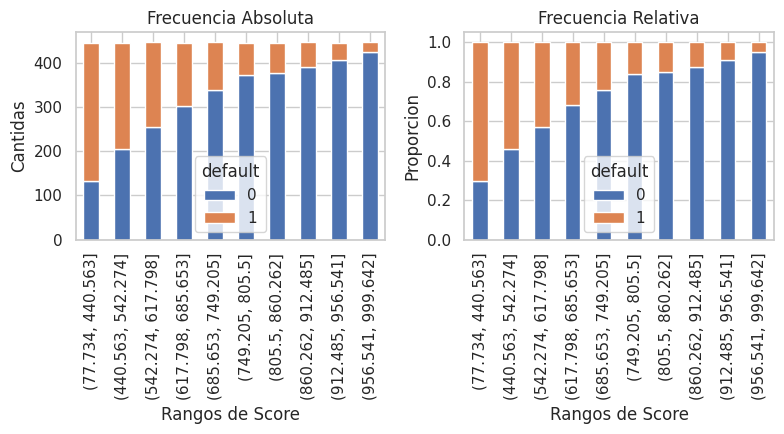

In [190]:
hist_fill_p(data['default'],data['score_logit'])#llamo a la función la cual me esta generando un histograma comparativo, data['defaul'] esta columna del DataFrame que contiene los valores reales de la variable objetivo 0 si cumple y 1 si no cumple. data['score_logit'] esta columna contiene los puntajes  o probabilidades (ya transformados y escalados) que produjo el modelo para cada observación, generalmente la probabilidad  de no cumplir o un score derivado de ella.


Conclusión del Grafico<br><br>
Grafico Frecuencia Absoluta<br>
Cada barra muestra el número total de clientes en ese rango de score. La parte azul representan los clientes con<br> default=0(cumplen) y la parte naranja con default=1(no cumplen) vemos que a medida que el score sube los rangos<br> de la derecha las barras azules es mayor, sugeriendo menos casos de incumplimiento en esos rangos.<br><br>
Gráfico Relativo<br><br>
En los primeros rangos la fraccion naranja incumple mientras en las ultimas barras la fracción azul cumple. Esto se<br> asocia que un score alto se asocia con una menor probabilidad de incumplir. <br><br>
En conjunto, los dos graficos evidencian que a medida que el score aumenta, disminuye la proporción de clientes que incumplen<br> y aumentan la que quienes cumplen. Es decir, el modelo está clasificando de manera correcta a mayor score implica menor riesgo de incumpliento.<br><br>


#Modelo Arbol

##Ajustar Modelo

In [191]:
from sklearn.tree import DecisionTreeClassifier#se utiliza para crear modelos de clasificación basados en árboles de decisión.

#Defino el modelo del árbol de decisión
reg_tree = DecisionTreeClassifier(random_state=5)#planto la semilla para que el resultado siempre sea el mismo.

#Entreno el modelo con los datos de entrenamiento
reg_tree.fit(X_train,y_train)

#muestro el modelo entrenado
reg_tree

DecisionTreeClassifier(random_state=5)

El modelo permite evaluar el desempeño comparándolo con otros modelos y ver si mejora la capacidad predictiva del proyecto

##Predicción Inicial

In [192]:
clas_tree = reg_tree.predict(X_test)


In [193]:
pd.crosstab(y_test,clas_tree,margins=True,rownames=['Valor real'], colnames={'Predicción Modelo'}).rename(columns={0:'Cumple', 1:'Incumple'},
                                                                                                           index={0:'Cumple',1:'Incumple','All':'Total'})


Predicción Modelo,Cumple,Incumple,All
Valor real,,,
Cumple,782,163,945
Incumple,211,181,392
Total,993,344,1337


Clientes que cumplen (Valor real 'Cumple')<br><br>
782 se predijeron correctamente como 'Cumple'<br>
163 se predijeron que no cumplen<br>
indica un recall de 782/945 = 79% para la clase 'Cumple'<br><br>
Clientes que incumplen (Valor real 'Incumple')<br><br>
181 se predijeron correctamente como 'Incumple'<br>
211 se predijeron erróneamente como 'Cumple' <br>
Esto refleja un recall de 179/392 = 49% para la base 'incumple'<br><br>
El modelo acierta de 782 + 163 = 952 sobre 1337. lo que equivale<br> a una exactitud de 53% sin embargo, la alta tasa de falsos positivos<br> en la clase 'Incumple' suguiere que el modelo tiende a predecir en <br>exceso la clase 'Cumple' esto representa un riesgo si se busca idenficar<br> los clientes que puedan incumplir.

In [194]:
print(classification_report(y_test,clas_tree))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       945
           1       0.53      0.46      0.49       392

    accuracy                           0.72      1337
   macro avg       0.66      0.64      0.65      1337
weighted avg       0.71      0.72      0.71      1337



Para la clase 0 (clientes que cumplen)<br><br>
Precisión 0.78: De los clientes clasificados como cumplidores, el 78% es correcto.<br>
Recall 0.82: El modelo identifica el 82% de los clientes que realmente cumplen.<br>
F1-score 0.80: Buen equilibrio entre precisión y recall en esta clase.<br><br>

Para la clase 1 (clientes incumplidores)<br>
Precisión 0.51: De los clientes clasificados como incumplidores, solo el 51% es correcto.<br>
Recall 0.46: El modelo detecta menos del 50% de los clientes que realmente incumplen.<br>
F1-score:0.48: La capacidad para identificar correctamente los incumplidores es baja.<br><br>
Exactitud (accuracy) del 71%: El modelo acierta de la predicciones totales, pero debido<br> a la desmejora en la clase incumplidor, su rendimiento global es moderado.<br><br>
El modelo de árbol de decision muestra un desempeño aceptable en la detección de clientes <br>cumplidores, pero su capacidad para identificar a los clientes incumplidores es limitada.<br> Esto se refleja en una precisión y recall bajos para la clase 1, lo que podria ser problematico<br> si el objetivo es detectar clientes de alto riesgo.

##Curva ROC

In [195]:
y_pred_proba = reg_tree.predict_proba(X_test_scaled)[:, 1]#me devuelve una matriz con dos columnas, la primera columna es la probabilidad de la clase 0 que cumple. La segunda columna es probabilidad de la clase 1 que no cumple

#y_pred_proba = reg_tree.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [196]:
roc_auc = roc_auc_score(y_test,y_pred_proba)#calculo los valores reales (y_test) y las probabilidades predichas(t_pred_proba)

print(f'AUC_ROC:{roc_auc}')

AUC_ROC:0.6540343915343915


indica que el modelo distingue las clases.

In [197]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)
print(f'Punto óptimo de corte: {roc_auc}')



Punto óptimo de corte: 0.6540343915343915


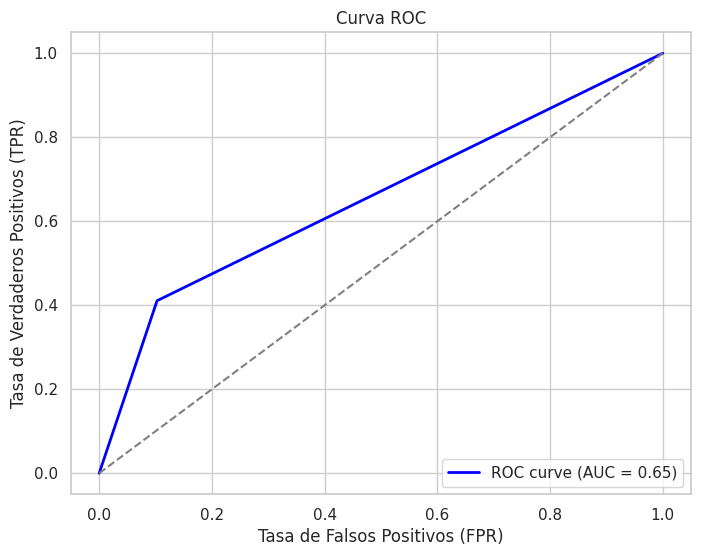

In [198]:

# Graficar la Curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Conclusión de la grafica<br><br>
El modelo basado en árboles de decisión tiene un desempeño bajo en términos de clasificación. Su capacidad predictiva es limitada.
<br><br>
Un AUC  de 0.59 indica que el modelo tiene un desempeño apenas mejor que un modelo aleatorio.<br>
Un buen modelo deberia tener un AUC cercano a 1, lo que implicaria una mejor capacidad para distinguir entre clases.<br><br>
La curva está relativamente cerca a la diagonal(modelo aleatorio) lo que suguiere que el modelo tiene dificultades para separar correctamente las clases (0 y 1).

In [199]:
clas_tree2 = reg_tree.predict(X_test)  # Predecir sobre el conjunto de prueba
pd.crosstab(y_test, clas_tree2,margins=True)



col_0,0,1,All
default,,,
0,782,163,945
1,211,181,392
All,993,344,1337


Conclusión de los resultados<br><br>
782 casos se predijeron correctamente como “0” (Verdaderos Negativos).<br>
163 casos se clasificaron erróneamente como “1” (Falsos Positivos).<br><br>
181 casos se predijeron correctamente como “1” (Verdaderos Positivos).<br>
211 casos fueron clasificados erróneamente como “0” (Falsos Negativos).<br><br>
El modelo favore la clase 0 'Cumple', aunque la cantidad de falsos positivos es baja (72) el modelo<br> El modelo tiene un rendimiento moderado, acierta la mayoría de los casos “No incumple” pero falla en casi la mitad de los “Incumple”.

In [200]:
print(classification_report(y_test, clas_tree2))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       945
           1       0.53      0.46      0.49       392

    accuracy                           0.72      1337
   macro avg       0.66      0.64      0.65      1337
weighted avg       0.71      0.72      0.71      1337



Conclusión del Reporte de Clasificación<br><br>
Desempeño clase 0
Precisión: 0.79 y Recall: 0.83.<br>
Esto indica que el modelo identifica correctamente la mayoría de los clientes que no incumplen, con buenos niveles tanto de precisión como de sensibilidad.<br><br>
Desempeño clase 1<br>
Precisión: 0.53 y Recall: 0.46.<br><br>
El modelo presenta un rendimiento bajo en detectar a los clientes que incumplen, lo que significa que aproximadamente solo el 46% de los incumplidores son identificados.

##score

In [201]:


def hist_fill_p(y_test, scaled_scores):
    """
    Crea dos histogramas (frecuencia absoluta y relativa) con 10 bins fijos.
    y_test: Serie con valores 0/1.
    scaled_scores: Puntajes o probabilidades * 1000, sin normalizar.
    """
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Definir manualmente 10 bins (0-100, 100-200, ..., 900-1000)
    bin_edges = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

    # Crear variable categórica
    rangos = pd.cut(scaled_scores, bins=bin_edges, include_lowest=True)

    # DataFrame auxiliar
    df_hist = pd.DataFrame({'score': scaled_scores, 'default': y_test, 'rangos': rangos})

    # Tabla pivote (conteo de casos por bin y clase)
    tabla_pivote = df_hist.pivot_table(
        index='rangos', columns='default', values='score', aggfunc='count', fill_value=0
    )

    # Gráfico Frecuencia Absoluta
    tabla_pivote.plot(kind='bar', stacked=True, ax=ax[0], colormap='tab10')
    ax[0].set_title('Frecuencia Absoluta')
    ax[0].set_xlabel('Rangos de Score')
    ax[0].set_ylabel('Cantidad')
    ax[0].tick_params(axis='x', rotation=45)

    # Frecuencia Relativa
    row_sums = tabla_pivote.sum(axis=1)
    tabla_relativa = tabla_pivote.div(row_sums, axis=0)

    # Gráfico Frecuencia Relativa
    tabla_relativa.plot(kind='bar', stacked=True, ax=ax[1], colormap='tab10')
    ax[1].set_title('Frecuencia Relativa')
    ax[1].set_xlabel('Rangos de Score')
    ax[1].set_ylabel('Proporción')
    ax[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


In [202]:
data['score_tree'] = (1-reg_tree.predict_proba(x)[:, 1])*1000#se calcula un score basado en la provabilidad de que una observación no pertenezca a la clase 1. Primero se obtiene la probabilidad de la calse 1(incumplen), se resta de 1 para obtener la probabilida clase 0, y luego se multiplica por 1000 para obtener un valor escalado. Este score se guarda en la columna score_logit de data.

<ipython-input-201-a752fababcf0>:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla_pivote = df_hist.pivot_table(


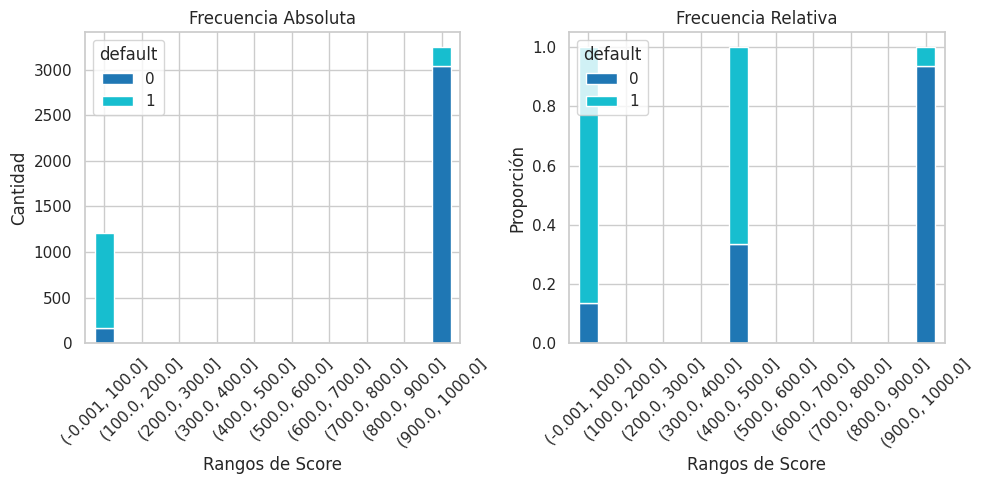

In [203]:
hist_fill_p(data['default'],data['score_tree'])#llamo a la función la cual me esta generando un histograma comparativo, data['defaul'] esta columna del DataFrame que contiene los valores reales de la variable objetivo 0 si cumple y 1 si no cumple.

Conclusión del grafico<br><br>
Frecuencia Absoluta<br>
En los rangos de score más bajos, hay pocos clientes.<br>
A medida que aumenta el score (hacia la derecha), la cantidad total de clientes crece de forma notable.
<br><br>
Frecuencia Relativa<br>
En los primeros rangos, predomina la clase “0” (cumple).<br>
Conforme el score se acerca a 1000, aumenta la proporción de la clase “1” (incumple).
<br><br>
Un score más alto se asocia con mayor probabilidad de incumplimiento (clase 1), mientras<br> que los scores bajos concentran menos clientes y la mayoría corresponde a quienes cumplen<br> (clase 0). Esto sugiere que el modelo asigna un riesgo creciente conforme el score aumenta.

#Modelo Random Forest

##Ajustar modelo

In [204]:
from sklearn.ensemble import RandomForestClassifier

In [205]:
reg_forest = RandomForestClassifier(random_state=42)
reg_forest.fit(X_train,y_train)
reg_forest

RandomForestClassifier(random_state=42)

##Predicción Inicial

In [206]:
clas_forest = reg_forest.predict(X_test)

In [207]:
pd.crosstab(y_test,clas_forest,margins=True)

col_0,0,1,All
default,,,
0,874,71,945
1,219,173,392
All,1093,244,1337


In [208]:
print(classification_report(y_test,clas_forest))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       945
           1       0.71      0.44      0.54       392

    accuracy                           0.78      1337
   macro avg       0.75      0.68      0.70      1337
weighted avg       0.77      0.78      0.77      1337



##Curva ROC

In [209]:
#Predicción  de Probabilidades
y_pred_proba = reg_forest.predict_proba(X_test_scaled)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [210]:
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC_ROC:{auc}')

AUC_ROC:0.7385150091782745


In [211]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print(f'Punto óptimo de corte: {auc}')

Punto óptimo de corte: 0.7385150091782745


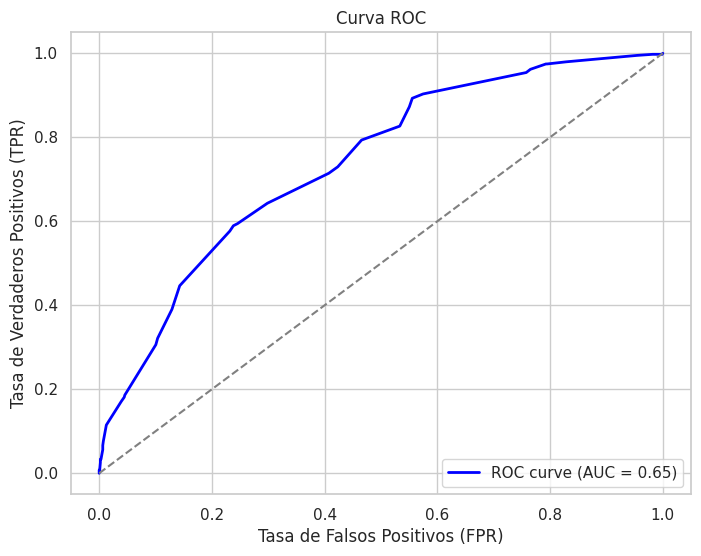

In [212]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Graficar la Curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [213]:
clas_forest2 = reg_forest.predict(X_test)
pd.crosstab(y_test,clas_forest2,margins=True)

col_0,0,1,All
default,,,
0,874,71,945
1,219,173,392
All,1093,244,1337


In [214]:
print(classification_report(y_test,clas_forest2))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       945
           1       0.71      0.44      0.54       392

    accuracy                           0.78      1337
   macro avg       0.75      0.68      0.70      1337
weighted avg       0.77      0.78      0.77      1337



##score

In [215]:

def hist_fill_p(y_test, scaled_scores):
    """
    Crea dos histogramas (frecuencia absoluta y relativa) con 10 bins fijos.
    y_test: Serie con valores 0/1.
    scaled_scores: Puntajes o probabilidades * 1000, sin normalizar.
    """
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Definir manualmente 10 bins (0-100, 100-200, ..., 900-1000)
    bin_edges = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

    # Crear variable categórica
    rangos = pd.cut(scaled_scores, bins=bin_edges, include_lowest=True)

    # DataFrame auxiliar
    df_hist = pd.DataFrame({'score': scaled_scores, 'default': y_test, 'rangos': rangos})

    # Tabla pivote (conteo de casos por bin y clase)
    tabla_pivote = df_hist.pivot_table(
        index='rangos', columns='default', values='score', aggfunc='count', fill_value=0
    )

    # Gráfico Frecuencia Absoluta
    tabla_pivote.plot(kind='bar', stacked=True, ax=ax[0], colormap='tab10')
    ax[0].set_title('Frecuencia Absoluta')
    ax[0].set_xlabel('Rangos de Score')
    ax[0].set_ylabel('Cantidad')
    ax[0].tick_params(axis='x', rotation=45)

    # Frecuencia Relativa
    row_sums = tabla_pivote.sum(axis=1)
    tabla_relativa = tabla_pivote.div(row_sums, axis=0)

    # Gráfico Frecuencia Relativa
    tabla_relativa.plot(kind='bar', stacked=True, ax=ax[1], colormap='tab10')
    ax[1].set_title('Frecuencia Relativa')
    ax[1].set_xlabel('Rangos de Score')
    ax[1].set_ylabel('Proporción')
    ax[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [216]:
data['score_forest'] = (1-reg_forest.predict_proba(x)[:, 1])*1000#se calcula un score basado en la provabilidad de que una observación no pertenezca a la clase 1. Primero se obtiene la probabilidad de la calse 1(incumplen), se resta de 1 para obtener la probabilida clase 0, y luego se multiplica por 1000 para obtener un valor escalado. Este score se guarda en la columna score_logit de data.

<ipython-input-215-a752fababcf0>:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla_pivote = df_hist.pivot_table(


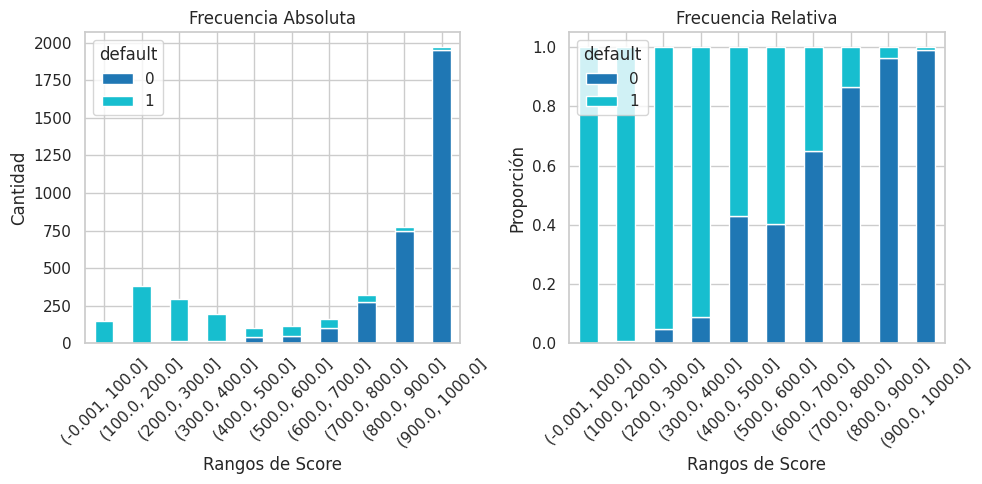

In [217]:
hist_fill_p(data['default'],data['score_forest'])#llamo a la función la cual me esta generando un histograma comparativo, data['defaul'] esta columna del DataFrame que contiene los valores reales de la variable objetivo 0 si cumple y 1 si no cumple.

Conclusión de graficas de barras.<br><b>
El grafica frecuencia absouta la mayoria de los casos (0 y 1) se encuentran en los scores más altos especialmente alrededor de 900 a 1000 de las personas que cumplen = 0 es consistentemente mayor en todos los rangos, mientras que los que incumple =1 se presenta en menor cantidad pero está presente a lo largo de los distintos tramos de score.<br><br>

Cocclución de grafica recuencia Relativa<br><br>
Casi en todos los rangos predominan las personas que cumplen = 0 lo que indica que, para cada intervalo de score, la mayor parte de las personas cumplen, las persona que incumplen = 1 varia segun el rango y tiende a ser más alta en puntuaciones  medias, mientras que en los rangos más elevados la proporción de las persona que incumplen = 1 es menor, a mayor score, menor probablidad de incumplir.
<br><br>
Recomendaciones: Verificar si el modelo esta bien equilibrado y revisar qué sucede en el rango  medio de los scores donde default = 1 sube.

#4.Evaluación del Modelo

In [218]:
print(classification_report(y_test, clas_logit2))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86       945
           1       0.81      0.36      0.50       392

    accuracy                           0.79      1337
   macro avg       0.80      0.66      0.68      1337
weighted avg       0.79      0.79      0.76      1337



In [219]:
print(classification_report(y_test, clas_tree2))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       945
           1       0.53      0.46      0.49       392

    accuracy                           0.72      1337
   macro avg       0.66      0.64      0.65      1337
weighted avg       0.71      0.72      0.71      1337



In [220]:
print(classification_report(y_test, clas_forest2))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       945
           1       0.71      0.44      0.54       392

    accuracy                           0.78      1337
   macro avg       0.75      0.68      0.70      1337
weighted avg       0.77      0.78      0.77      1337



Conclución de los modelos<br><br>
En el Random Forest, el recall es de 0.44, en comparación con 0.36 en la regresión logística. Esto significa que el Random Forest identifica a un 22% más de defaulters, algo fundamental para minimizar riesgos financieros.<br><br>

La precisión en la clase 1 es de 0.71, lo que, aun siendo inferior a la de la regresión logística (0.81), se compensa con una mejora notable en la detección de incumplimientos.<br><br>

El f1 score mejora de 0.50 en la regresión logi´stica a 0.54 en el Random Forest, lo que indica un mejor balance entre precisión y recall.<br><br>

Los resultados de Random Forest son similares a los del árbol de decisión, la verdadera ventaja del Random Forest radica en su capacidad para ajustar hiperparametros. Esto me permitira afinar el modelo según las caracteristicas especificas de los datos, optimizando aún más el equilibrio entre precisíon y recall. Esta adaptabilidadd es esencial para este proyecto, donde la identificación temprana de default's puede marcar la diferencia.




In [221]:
perfil = x.iloc[0:1]
perfil

,Años laborales,Plz prestamo meses,Edad,Gasto mensual,Ingresos mensuales,Ahorros,deudas,Dinero Solicitado,Dinero a devolver,clase vivienda_alquiler,...,Estado civil_casado,Estado civil_other,Estado civil_soltero,Historial creditos_no,Historial creditos_yes,Tipo empleo_desconocido,Tipo empleo_fijo,Tipo empleo_independiente,Tipo empleo_otros,Tipo empleo_parcial
0,9,60,30,73.0,129.0,0.0,0.0,800,846.0,1,...,1,0,0,1,0,0,0,1,0,0


Tomo el primer registro del DataFrame para analizarlo por separado.

#5. Implementar

##Crear el perfil de prueba

In [222]:

def crear_fila_dataframe():
    # Diccionario base con todos los campos inicializados a cero, usando los nombres de columnas esperados
    datos = {
        'Años laborales': 0.0, 'Plz prestamo meses': 0.0, 'Edad': 0.0, 'Gasto mensual': 0.0,
        'Ingresos mensuales': 0.0, 'Ahorros': 0.0, 'deudas': 0.0, 'Dinero Solicitado': 0.0,
        'Dinero a devolver': 0.0, 'clase vivienda_other': 0.0, 'clase vivienda_propietario': 0.0,
        'clase vivienda_padres': 0.0, 'clase vivienda_privado': 0.0, 'clase vivienda_alquiler': 0.0,
        'Estado civil_casado': 0.0, 'Estado civil_other': 0.0, 'Estado civil_soltero': 0.0,
        'Historial creditos_no': 0.0, 'Historial creditos_yes': 0.0, 'Tipo empleo_fijo': 0.0,
        'Tipo empleo_independiente': 0.0, 'Tipo empleo_others': 0.0, 'Tipo empleo_parcial': 0.0,
        'Tipo empleo_desconocido': 0.0}

    # Rellenar los datos mediante input del usuario
    for i in datos:
        valor = input(f"{i} (actual: {datos[i]}): ")
        if valor.strip():  # Si no está vacío, actualizar el valor
            datos[i] = float(valor)

    # Crear DataFrame con una única fila
    df = pd.DataFrame([datos])
    if 'Tipo empleo_others' in df.columns and 'Tipo empleo_otros' not in df.columns:
        df = df.rename(columns={'Tipo empleo_others': 'Tipo empleo_otros'})

    return df

In [223]:
0
# Uso de la función
df_usuario = crear_fila_dataframe()

Años laborales (actual: 0.0): 6000
Plz prestamo meses (actual: 0.0): 12
Edad (actual: 0.0): 35
Gasto mensual (actual: 0.0): 2000
Ingresos mensuales (actual: 0.0): 5000
Ahorros (actual: 0.0): 
deudas (actual: 0.0): 
Dinero Solicitado (actual: 0.0): 
Dinero a devolver (actual: 0.0): 
clase vivienda_other (actual: 0.0): 0
clase vivienda_propietario (actual: 0.0): 0
clase vivienda_padres (actual: 0.0): 1
clase vivienda_privado (actual: 0.0): 0
clase vivienda_alquiler (actual: 0.0): 0
Estado civil_casado (actual: 0.0): 1
Estado civil_other (actual: 0.0): 0
Estado civil_soltero (actual: 0.0): 0
Historial creditos_no (actual: 0.0): 0
Historial creditos_yes (actual: 0.0): 0
Tipo empleo_fijo (actual: 0.0): 0
Tipo empleo_independiente (actual: 0.0): 0
Tipo empleo_others (actual: 0.0): 1
Tipo empleo_parcial (actual: 0.0): 0
Tipo empleo_desconocido (actual: 0.0): 0


#Generamos Predicción

In [231]:
# Obtener los nombres de las características del modelo entrenado
feature_names = reg_forest.feature_names_in_

# Reordenar las columnas en df_usuario para que coincidan con los datos de entrenamiento
df_usuario = df_usuario[feature_names]



In [232]:
# Escala los datos de entrada del usuario
df_usuario_scaled = scaler.transform(df_usuario)

# predice el riesgo
risk =reg_forest.predict_proba(df_usuario_scaled)[0][1]
print(f"Score del cliente {(1 - risk) * 1000:.0f}")

Score del cliente 570


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [233]:
risk =reg_forest.predict_proba(df_usuario)[0][1]
print(f"Score del cliente {(1 - risk) * 1000:.0f}")

Score del cliente 650


#Modelo reg_forest optimizado

In [234]:
#'default'
X2 =data.drop(columns=['default'])
y2 = data['default']

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2,
    test_size=0.3,
    random_state=42,
    stratify=y2  # mantiene la proporción de la clase 1
)


Separo las caracteristicas X2 de la variable objetivo y2 que es default, divido los datos en entrenamiento y prueba

In [228]:
# Convertir variables categóricas a numéricas con get_dummies
data_encoded = pd.get_dummies(data, drop_first=True)

#separo 'X' y  'y' usando el DataFrame
X2 = data_encoded.drop(columns=['default'])
y2 = data_encoded['default']


X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2,
    test_size=0.3,
    random_state=42,
    stratify=y2
)

scaler2 = StandardScaler()

# Ajustar el escalador en los datos de entrenamiento (ya numéricos)
scaler2.fit(X_train2)

# Transformar ambos conjuntos
X_train_scaled2 = scaler2.transform(X_train2)
X_test_scaled2 = scaler2.transform(X_test2)


In [235]:

smote2 = SMOTE(random_state=42)
X_train_bal2, y_train_bal2 = smote2.fit_resample(X_train_scaled2, y_train2)

Utilizo SMOTE para balancear los datos de entrenamiento escalados, generando ejemplo<br>sinteticos de la base minioritaria para lograr una distribución más equitativa entre las clases.<br>Me ayuda a que el modelo aprenda mejor las caracteristicas de ambas clases especialmente<br> default =1 clientes que incumplen

In [237]:

param_grid2 = {
    'n_estimators': [100, 200],#de 100 a 200 arboles de prueba
    'max_depth': [None, 10, 20],#Profundidad maxima de cada arbol
    'min_samples_split': [2, 5],#numero de muestras necesarias para divir el nodo
    'min_samples_leaf': [1, 2]#numero minimo que de muestras que debe tener una hoja
}

rf2 = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search2 = GridSearchCV(
    estimator=rf2,#el modelo que se va optimizar
    param_grid=param_grid2,#numero de arboles de profundidad
    scoring='recall',  # optimiza para mayor d
    cv=5,#Utilizo validación cruzada con 5 particiones para evaluar para cada combinación
    n_jobs=-1,#Todos los nucleos para acelerar las busqueda
    verbose=1#informacion detallada del proceso
)

grid_search2.fit(X_train_bal2, y_train_bal2)

# Modelo óptimizado
best_rf2 = grid_search2.best_estimator_

print("Mejores parámetros encontrados:", grid_search2.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros encontrados: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


La mejor configuración cruzada para el modelo es permitir que los árboles<br>  crezcan sin limite de profundidad, con hojas que puedan contener al menos<br>  1 muestra, dividiendo los nodos con 2 muestras o más, y utilizando 200<br>  arboles en el conjunto.

In [238]:
y_pred2 = best_rf2.predict(X_test_scaled2)

print("\nMatriz de Confusión (Modelo Optimizado):")
print(pd.crosstab(y_test2, y_pred2, margins=True))


Matriz de Confusión (Modelo Optimizado):
col_0      0    1   All
default                
0        911   50   961
1         29  347   376
All      940  397  1337


El modelo esta clasificando correctamente 911 de 961 casos de cumplidores,<br>  y 347 de 376 casos de incumplidores: El modelo tiene un rendimiento<br> sólido en ambas clases 0  y 1, con pocos errores 50 falsos possitivos y 29<br>  falsos negativos.

In [239]:
print("\nReporte de Clasificación (Modelo Optimizado):")
print(classification_report(y_test2, y_pred2))


Reporte de Clasificación (Modelo Optimizado):
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       961
           1       0.87      0.92      0.90       376

    accuracy                           0.94      1337
   macro avg       0.92      0.94      0.93      1337
weighted avg       0.94      0.94      0.94      1337



Clase 0 <br><br>
Precisión del 97%, significa que casi todos los<br> cumplidos se clasifican correctamente.<br><br>
Clase 1 <br><br>
Precisión del 87% y recall del 92%, el modelo datecta la mayoria<br>  de los incumplidores, aunque se comenten algunos errores.<br><br>
Global<br><br>
Una exactitud de 94%, balance en f1-score, el modelo logra un buen<br>  desempeño entre precisión y capacidad de dectección de ambas clases.

In [240]:
y_pred_proba2 = best_rf2.predict_proba(X_test_scaled2)[:, 1]

# Curva ROC
fpr2, tpr2, thresholds2 = roc_curve(y_test2, y_pred_proba2)
roc_auc2 = roc_auc_score(y_test2, y_pred_proba2)
print(f"AUC del modelo en Test (Optimizado): {roc_auc2:.3f}")



AUC del modelo en Test (Optimizado): 0.970


In [241]:
# Índice de Youden para encontrar el umbral óptimo
youden_index2 = tpr2 - fpr2
optimal_threshold2 = thresholds2[np.argmax(youden_index2)]
print(f"Umbral óptimo según índice de Youden: {optimal_threshold2:.3f}")


Umbral óptimo según índice de Youden: 0.425


El umbral óptimo obtenido representa el punto de corte ideal para diferenciar<br> entre el punto de corte ideal para diferenciar entre cumplidores y incumplidores.

In [242]:
# Predicción con umbral ajustado
y_pred_adjusted2 = (y_pred_proba2 >= optimal_threshold2).astype(int)

print("\nReporte con Umbral Ajustado (Modelo Optimizado):")
print(classification_report(y_test2, y_pred_adjusted2))


Reporte con Umbral Ajustado (Modelo Optimizado):
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       961
           1       0.85      0.94      0.89       376

    accuracy                           0.94      1337
   macro avg       0.91      0.94      0.93      1337
weighted avg       0.94      0.94      0.94      1337



Clase 0 cumplidores: Precisión de 98% y recall del 94%<br><br>
Clase 1 Incumplidores: La precisión del 85%, se mantiene un buen recall de 94%,<br> el modelo esta detectando efizcamente la mayoría de los incumplidores. <br><br>
El ajuste del umbral logra un equilibrio favorable, priorizando la detección de<br> incumplidores sin sacrificar demasiado la precisión global.

In [243]:
12
# Crear el DataFrame del nuevo usuario
df_usuario = crear_fila_dataframe()

Años laborales (actual: 0.0): 6000
Plz prestamo meses (actual: 0.0): 12
Edad (actual: 0.0): 35
Gasto mensual (actual: 0.0): 2000
Ingresos mensuales (actual: 0.0): 5000
Ahorros (actual: 0.0): 
deudas (actual: 0.0): 
Dinero Solicitado (actual: 0.0): 
Dinero a devolver (actual: 0.0): 
clase vivienda_other (actual: 0.0): 0
clase vivienda_propietario (actual: 0.0): 0
clase vivienda_padres (actual: 0.0): 1
clase vivienda_privado (actual: 0.0): 0
clase vivienda_alquiler (actual: 0.0): 0
Estado civil_casado (actual: 0.0): 1
Estado civil_other (actual: 0.0): 0
Estado civil_soltero (actual: 0.0): 0
Historial creditos_no (actual: 0.0): 0
Historial creditos_yes (actual: 0.0): 0
Tipo empleo_fijo (actual: 0.0): 0
Tipo empleo_independiente (actual: 0.0): 0
Tipo empleo_others (actual: 0.0): 1
Tipo empleo_parcial (actual: 0.0): 0
Tipo empleo_desconocido (actual: 0.0): 0


In [244]:
# Obtener los nombres de las características del modelo entrenado
feature_names = reg_forest.feature_names_in_

# Reordenar las columnas en df_usuario para que coincidan con los datos de entrenamiento
df_usuario = df_usuario[feature_names]

In [245]:
# Escala los datos de entrada del usuario
df_usuario_scaled_op = scaler.transform(df_usuario)


risk =reg_forest.predict_proba(df_usuario_scaled)[0][1]
print(f"Score del cliente {(1 - risk) * 1000:.0f}")

Score del cliente 570


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [246]:
# predice el riesgo
risk_op =reg_forest.predict_proba(df_usuario)[0][1]
print(f"Score del cliente {(1 - risk_op) * 1000:.0f}")

Score del cliente 650
